# pycisTopic analysis

Full dataset, using consensus peak regions.

In [1]:
import pycisTopic

%load_ext nb_black
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import pickle
import pandas as pd
import os

%load_ext lab_black

<IPython.core.display.Javascript object>

In [2]:
wdir = "/lustre1/project/stg_00090/scatac_benchmark/fixedcells_5_cell_downsampling"
os.chdir(wdir)

<IPython.core.display.Javascript object>

In [3]:
# create output directory:
f_final_dir = os.path.join(wdir, "downstream_analysis")
if not os.path.exists(f_final_dir):
    os.makedirs(f_final_dir)

<IPython.core.display.Javascript object>

In [4]:
import glob

<IPython.core.display.Javascript object>

## Save/load cisTopic objects

In [5]:
cto_consensus_paths = sorted(glob.glob(f"cistopic_objects_subsampled/*consensus.pkl"))
cistopic_obj_path_dict = {
    x.split("/")[-1].split(f"__")[0] + "." + x.split("/")[-1].split(f".")[-5]: x
    for x in cto_consensus_paths
}
cistopic_obj_path_dict

{'BIO_ddseq_1.FIXEDCELLS.05k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.05k.model_10topics.dimreduc.consensus.pkl',
 'BIO_ddseq_1.FIXEDCELLS.15k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.15k.model_11topics.dimreduc.consensus.pkl',
 'BIO_ddseq_1.FIXEDCELLS.1k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.1k.model_10topics.dimreduc.consensus.pkl',
 'BIO_ddseq_1.FIXEDCELLS.25k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.25k.model_9topics.dimreduc.consensus.pkl',
 'BIO_ddseq_1.FIXEDCELLS.2k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.2k.model_12topics.dimreduc.consensus.pkl',
 'BIO_ddseq_1.FIXEDCELLS.3k': 'cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.3k.model_11topics.dimreduc.consensus.pkl',
 'BIO_ddseq_2.FIXEDCELLS.05k': 'cistopic_objects_subsampled/BIO_d

<IPython.core.display.Javascript object>

## Topic binarization & QC

In [6]:
from pycisTopic.topic_binarization import binarize_topics
from pycisTopic.topic_qc import compute_topic_metrics, plot_topic_qc
from pycisTopic.utils import fig2img
import matplotlib.pyplot as plt
from pycisTopic.topic_qc import topic_annotation
from pycisTopic.diff_features import (
    impute_accessibility,
    normalize_scores,
    find_highly_variable_features,
    find_diff_features,
)
from pycisTopic.clust_vis import plot_imputed_features
import numpy as np
import copy

<IPython.core.display.Javascript object>

### Binarize the topic-region distributions

Loading cistopic_objects_subsampled/BIO_ddseq_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.05k.model_10topics.dimreduc.consensus.pkl


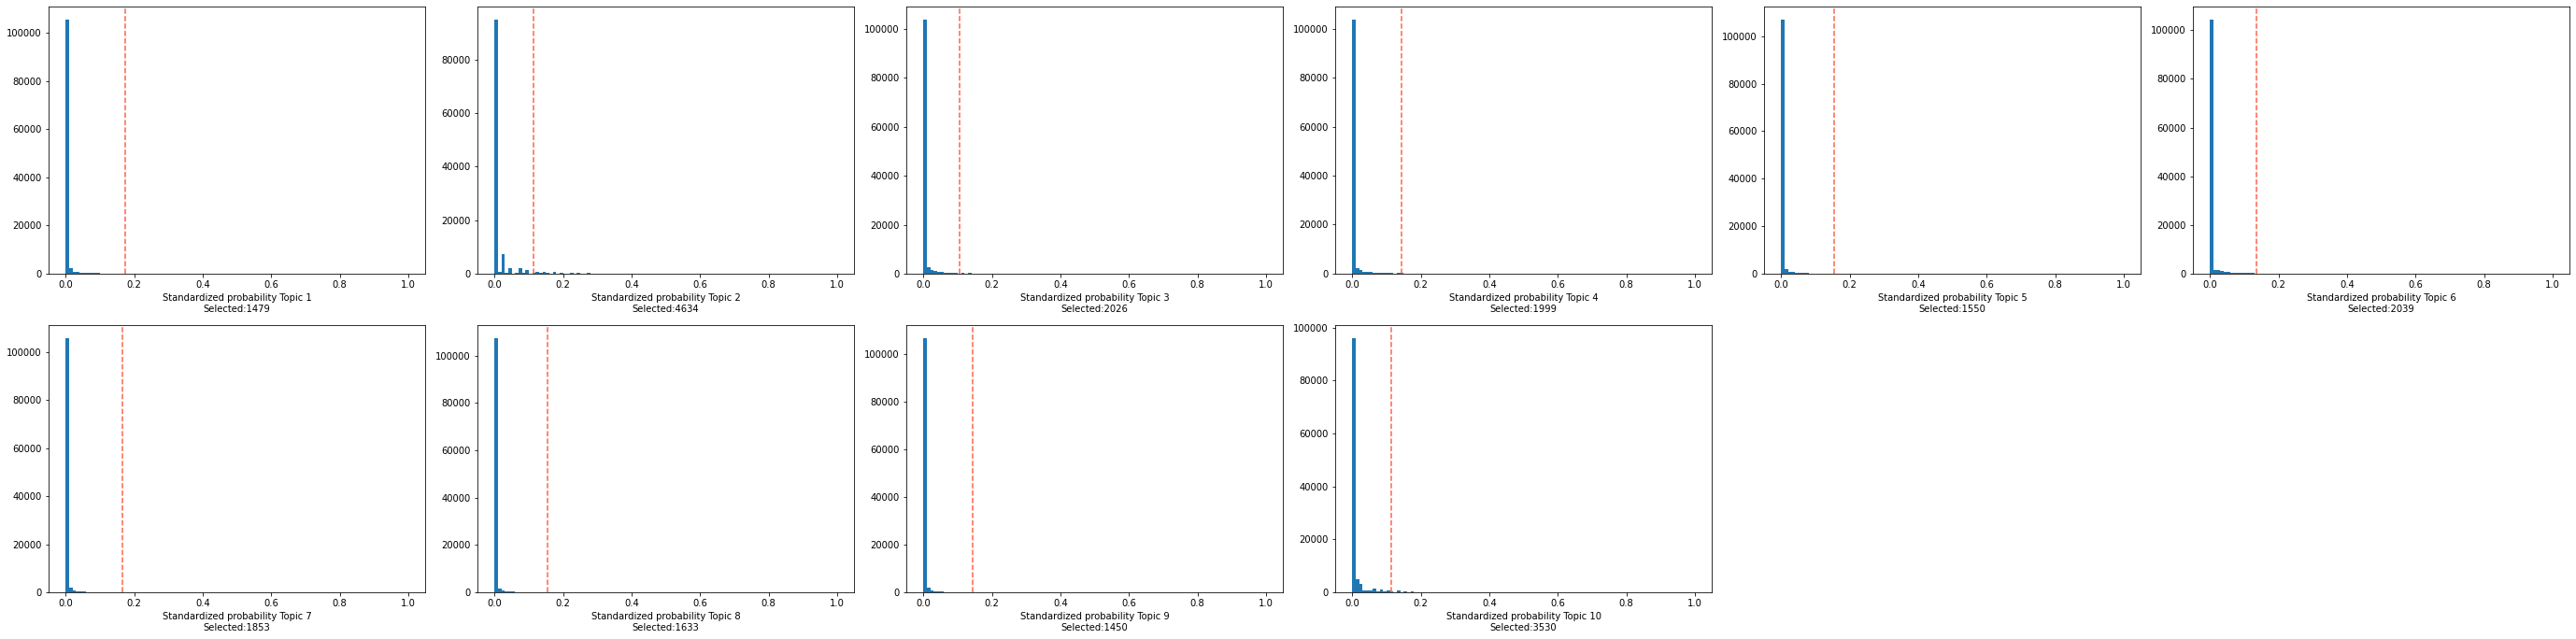

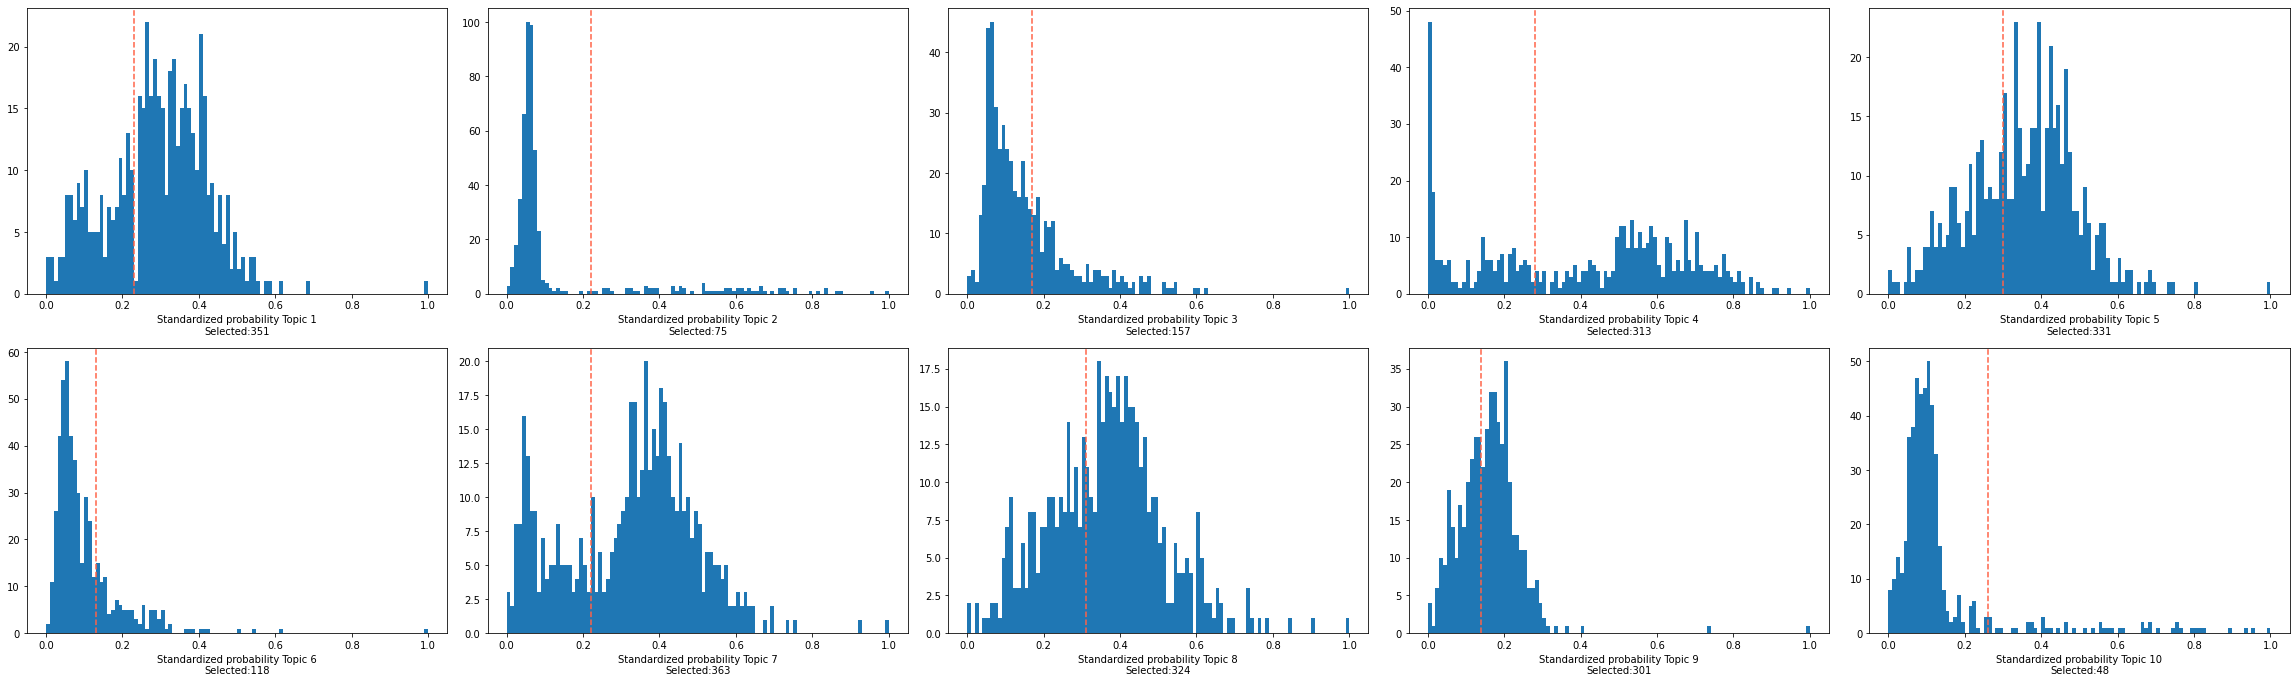

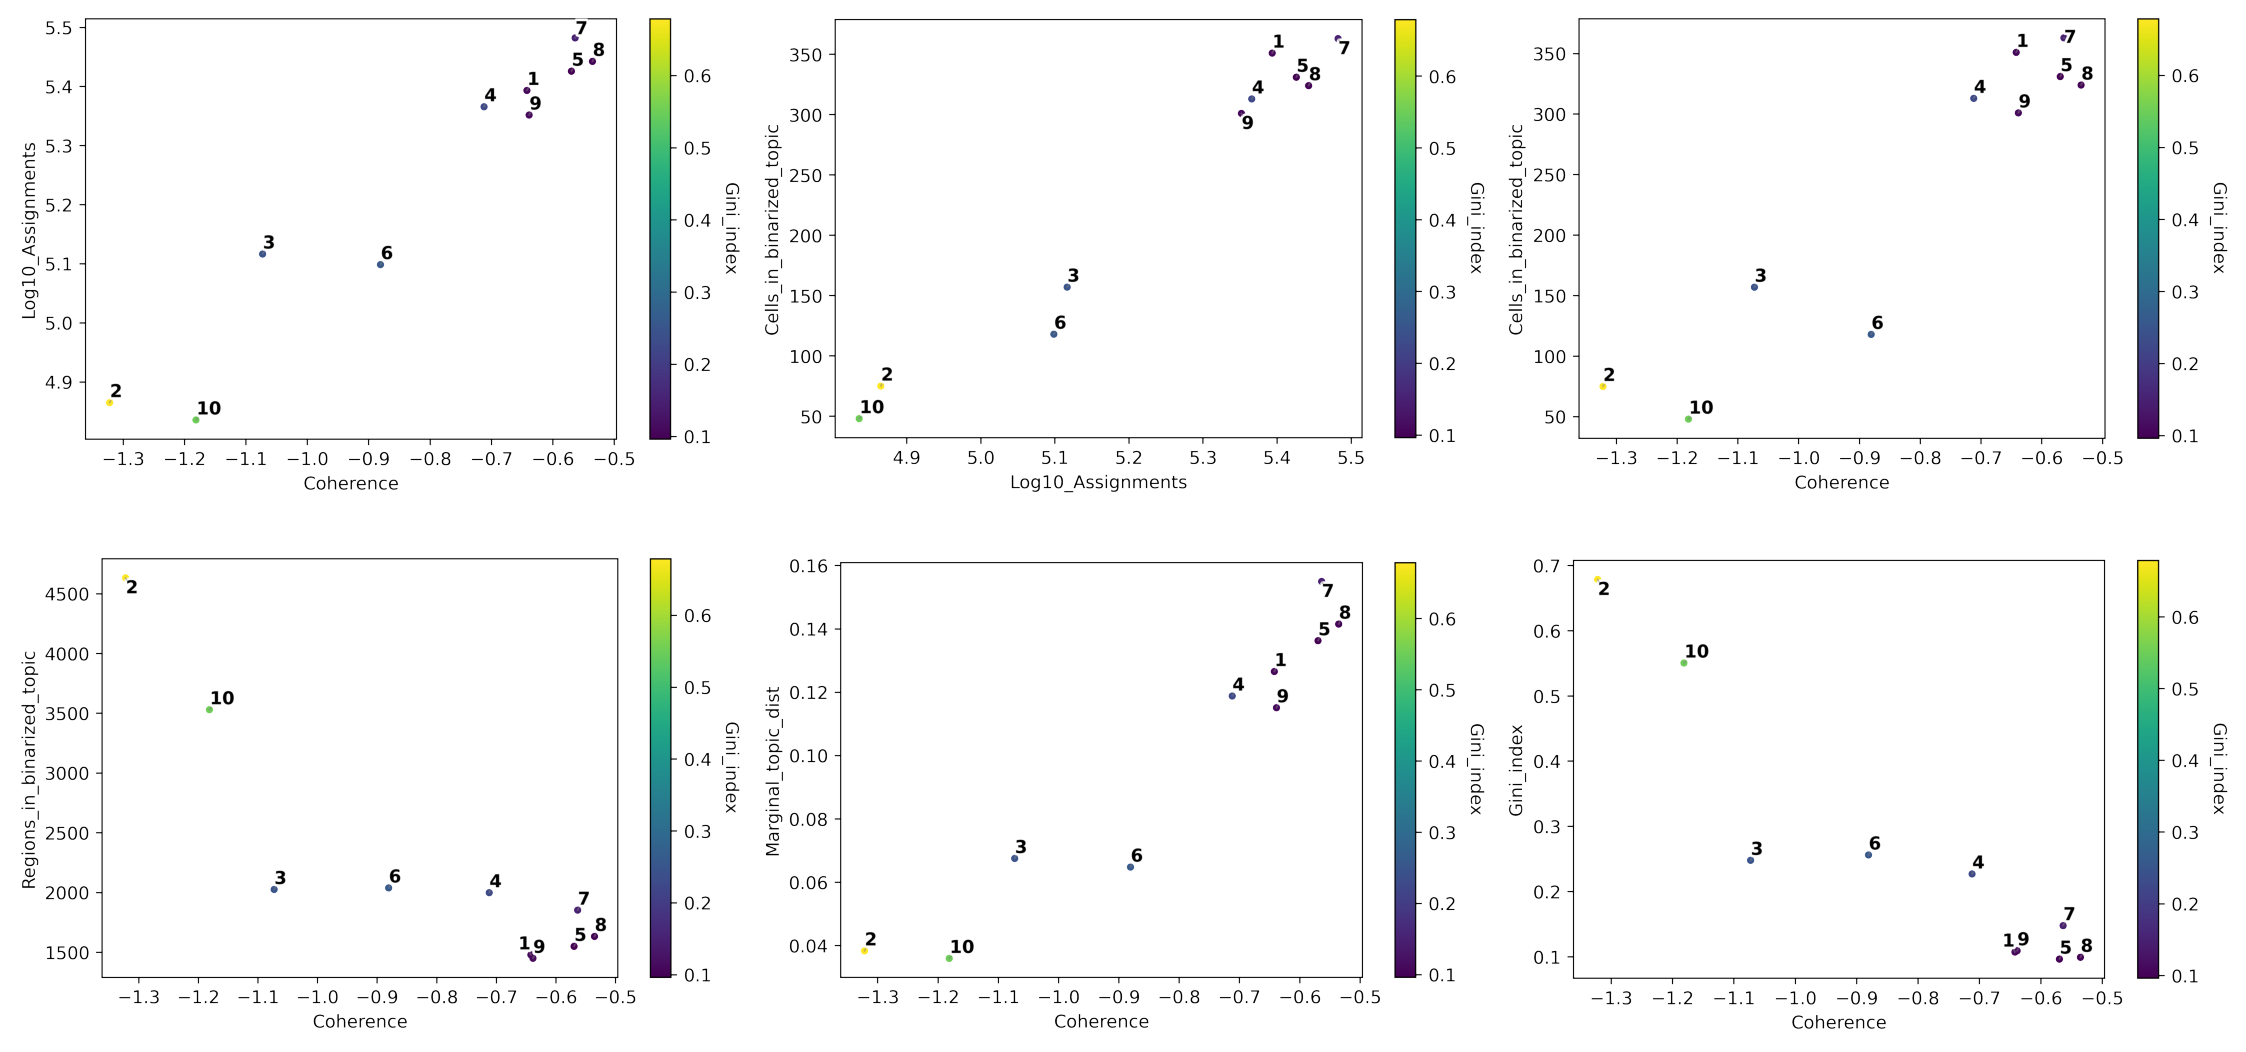

2022-12-19 21:42:20,535 cisTopic     INFO     Imputing drop-outs
2022-12-19 21:42:20,661 cisTopic     INFO     Scaling
2022-12-19 21:42:20,781 cisTopic     INFO     Keep non zero rows
2022-12-19 21:42:20,958 cisTopic     INFO     Imputed accessibility sparsity: 0.310673113569783
2022-12-19 21:42:20,959 cisTopic     INFO     Create CistopicImputedFeatures object
2022-12-19 21:42:20,960 cisTopic     INFO     Done!
2022-12-19 21:42:20,961 cisTopic     INFO     Normalizing imputed data
2022-12-19 21:42:21,426 cisTopic     INFO     Done!
2022-12-19 21:42:21,834 cisTopic     INFO     Calculating mean
2022-12-19 21:42:21,889 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

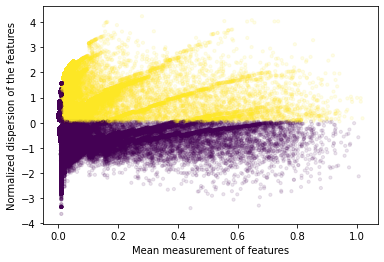

2022-12-19 21:42:26,534 cisTopic     INFO     Done!
Found 23847 variable regions


2022-12-19 21:42:30,240	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=3382021) 2022-12-19 21:42:34,267 cisTopic     INFO     Formatting data for B cell
(markers_ray pid=3382021) 2022-12-19 21:42:34,373 cisTopic     INFO     Computing p-value for B cell
(markers_ray pid=3382026) 2022-12-19 21:42:34,325 cisTopic     INFO     Formatting data for CD4+ T cell
(markers_ray pid=3382017) 2022-12-19 21:42:34,355 cisTopic     INFO     Formatting data for CD14+ monocyte
(markers_ray pid=3382026) 2022-12-19 21:42:34,426 cisTopic     INFO     Computing p-value for CD4+ T cell
(markers_ray pid=3382017) 2022-12-19 21:42:34,463 cisTopic     INFO     Computing p-value for CD14+ monocyte
(markers_ray pid=3382018) 2022-12-19 21:42:34,448 cisTopic     INFO     Formatting data for Natural killer cell
(markers_ray pid=3382024) 2022-12-19 21:42:34,464 cisTopic     INFO     Formatting data for Cytotoxic T cell
(markers_ray pid=3382018) 2022-12-19 21:42:34,550 cisTopic     INFO     Computing p-value for Natural killer cell
(markers_ray pid=3382024) 2022-12-19 21

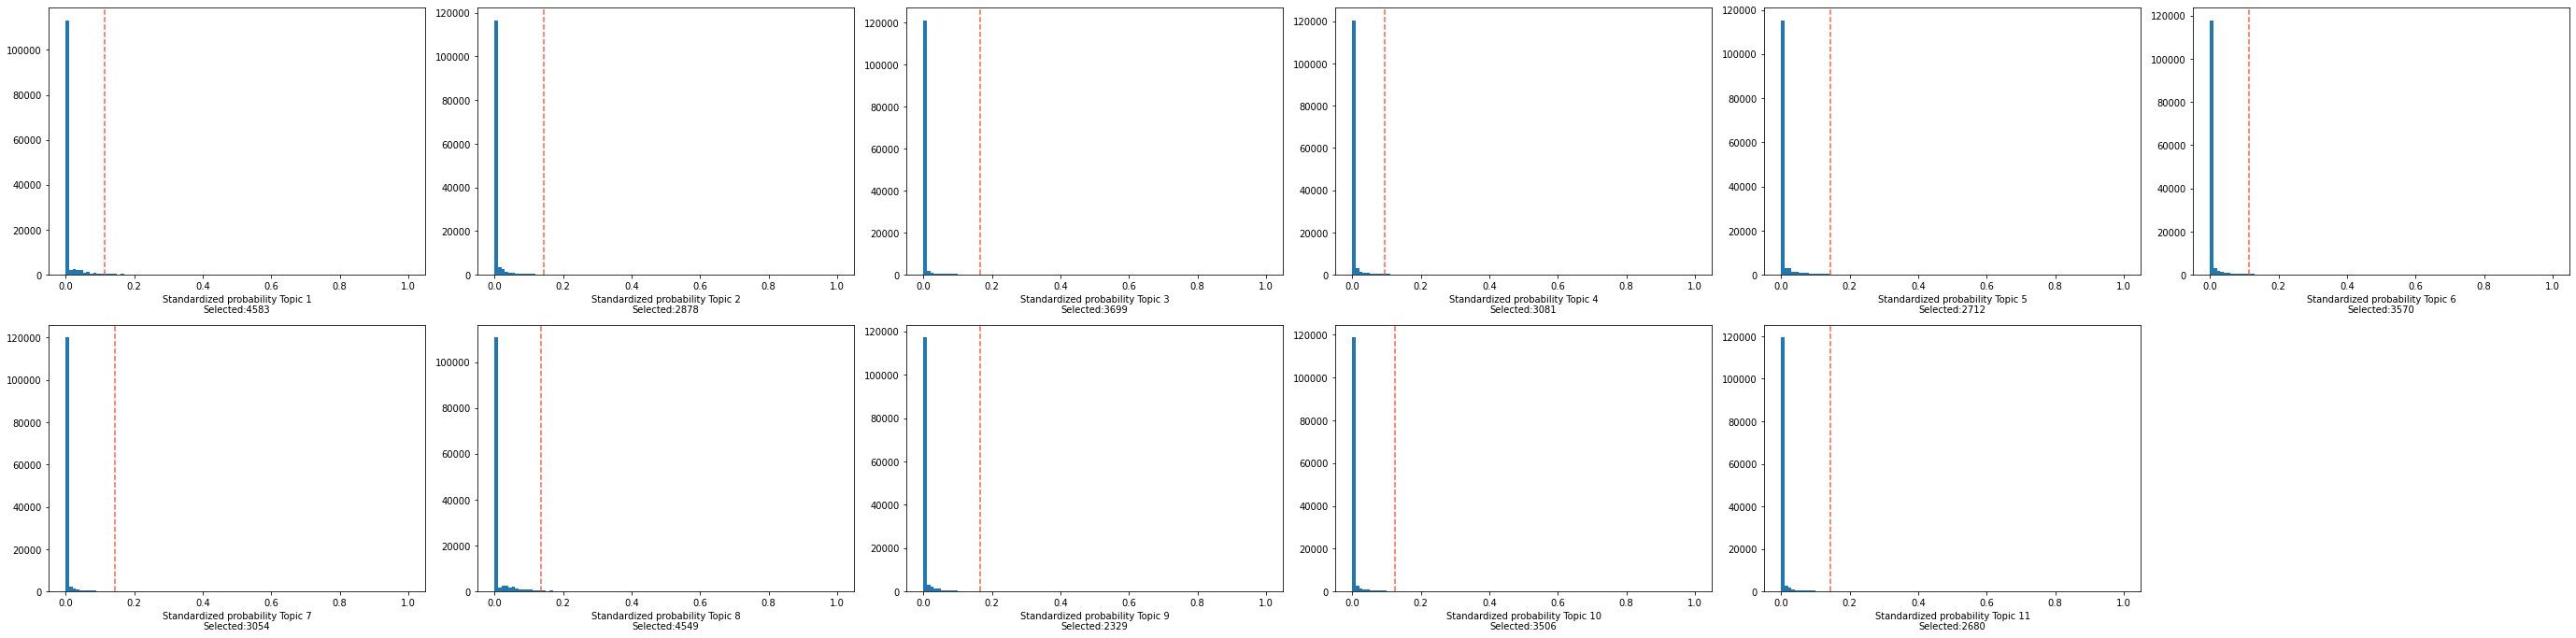

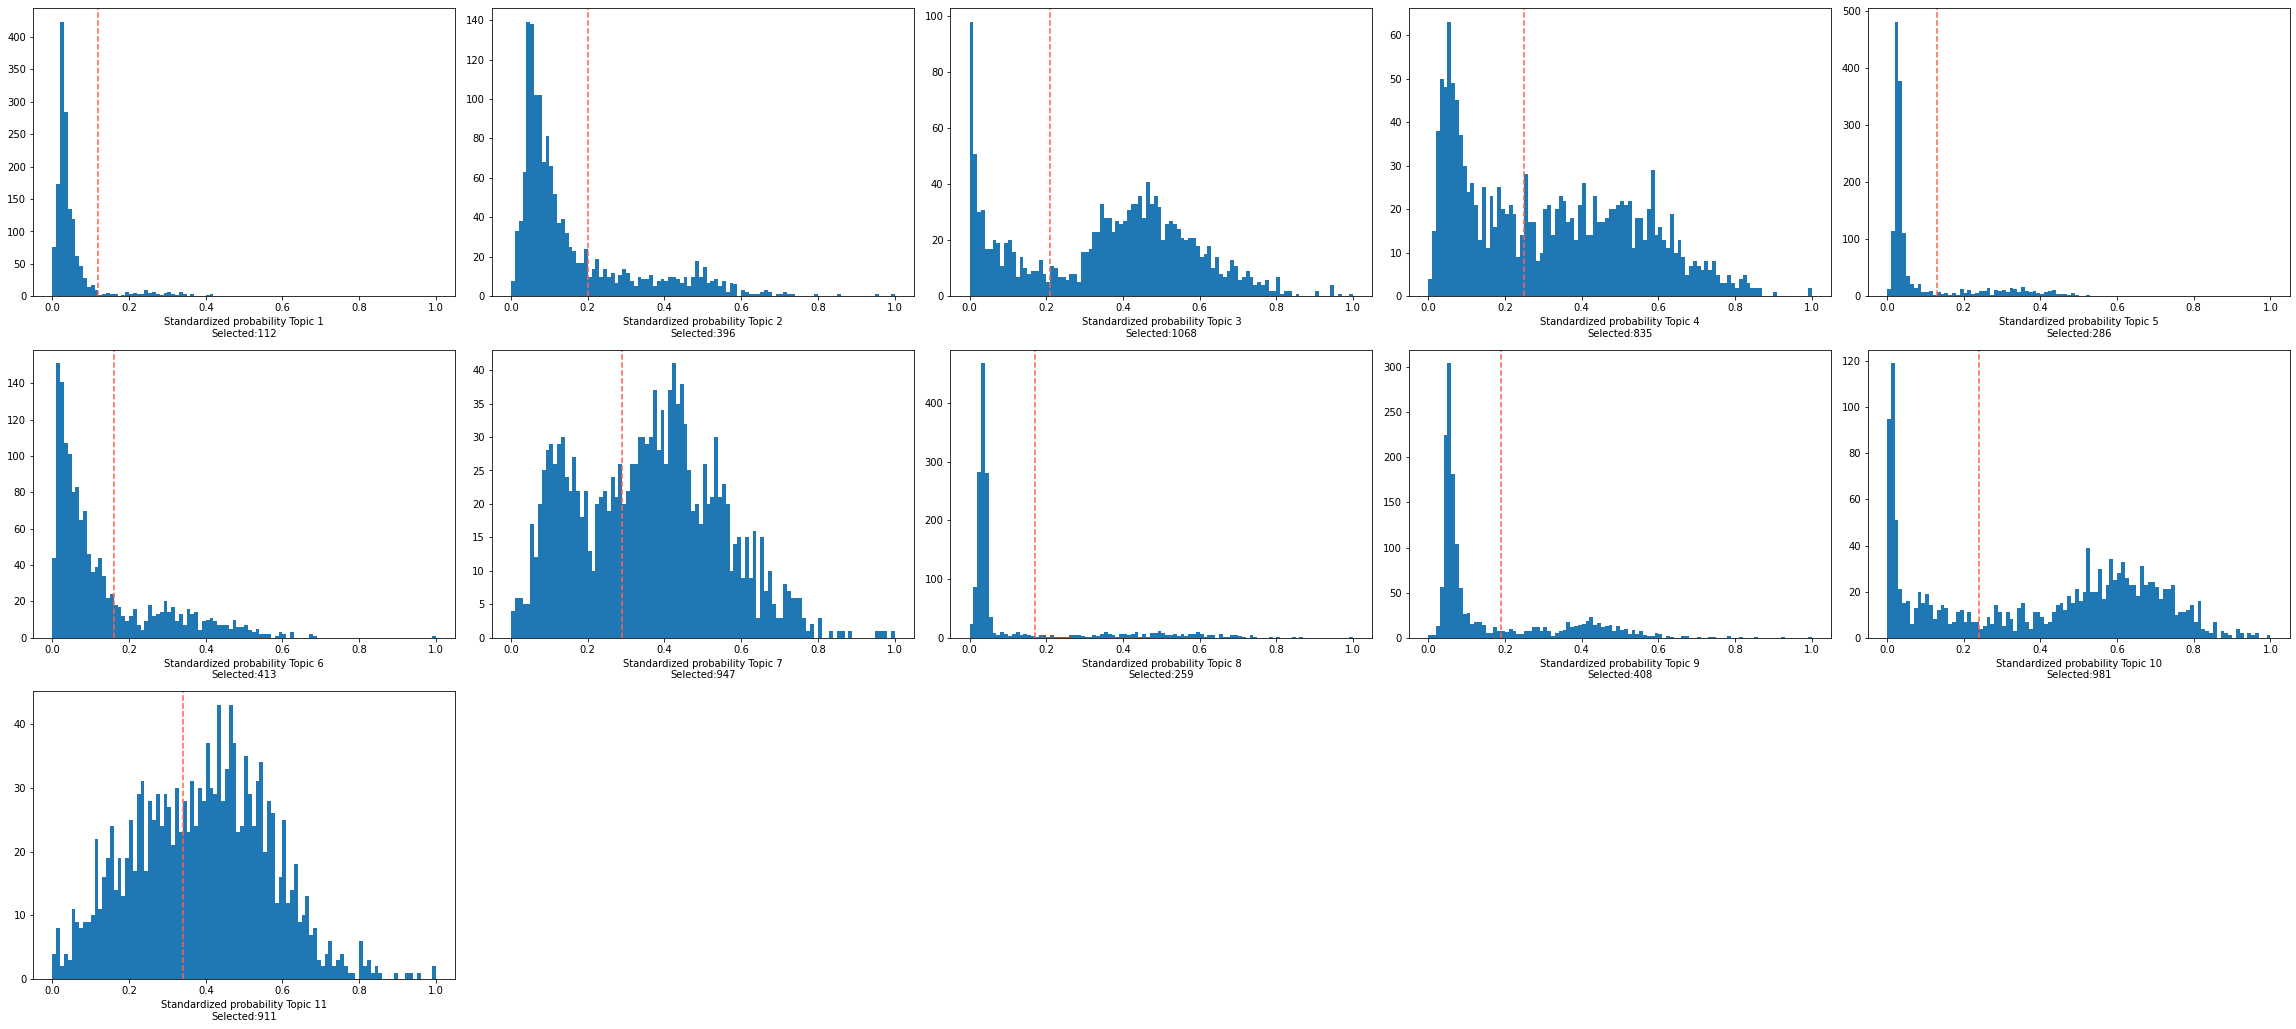

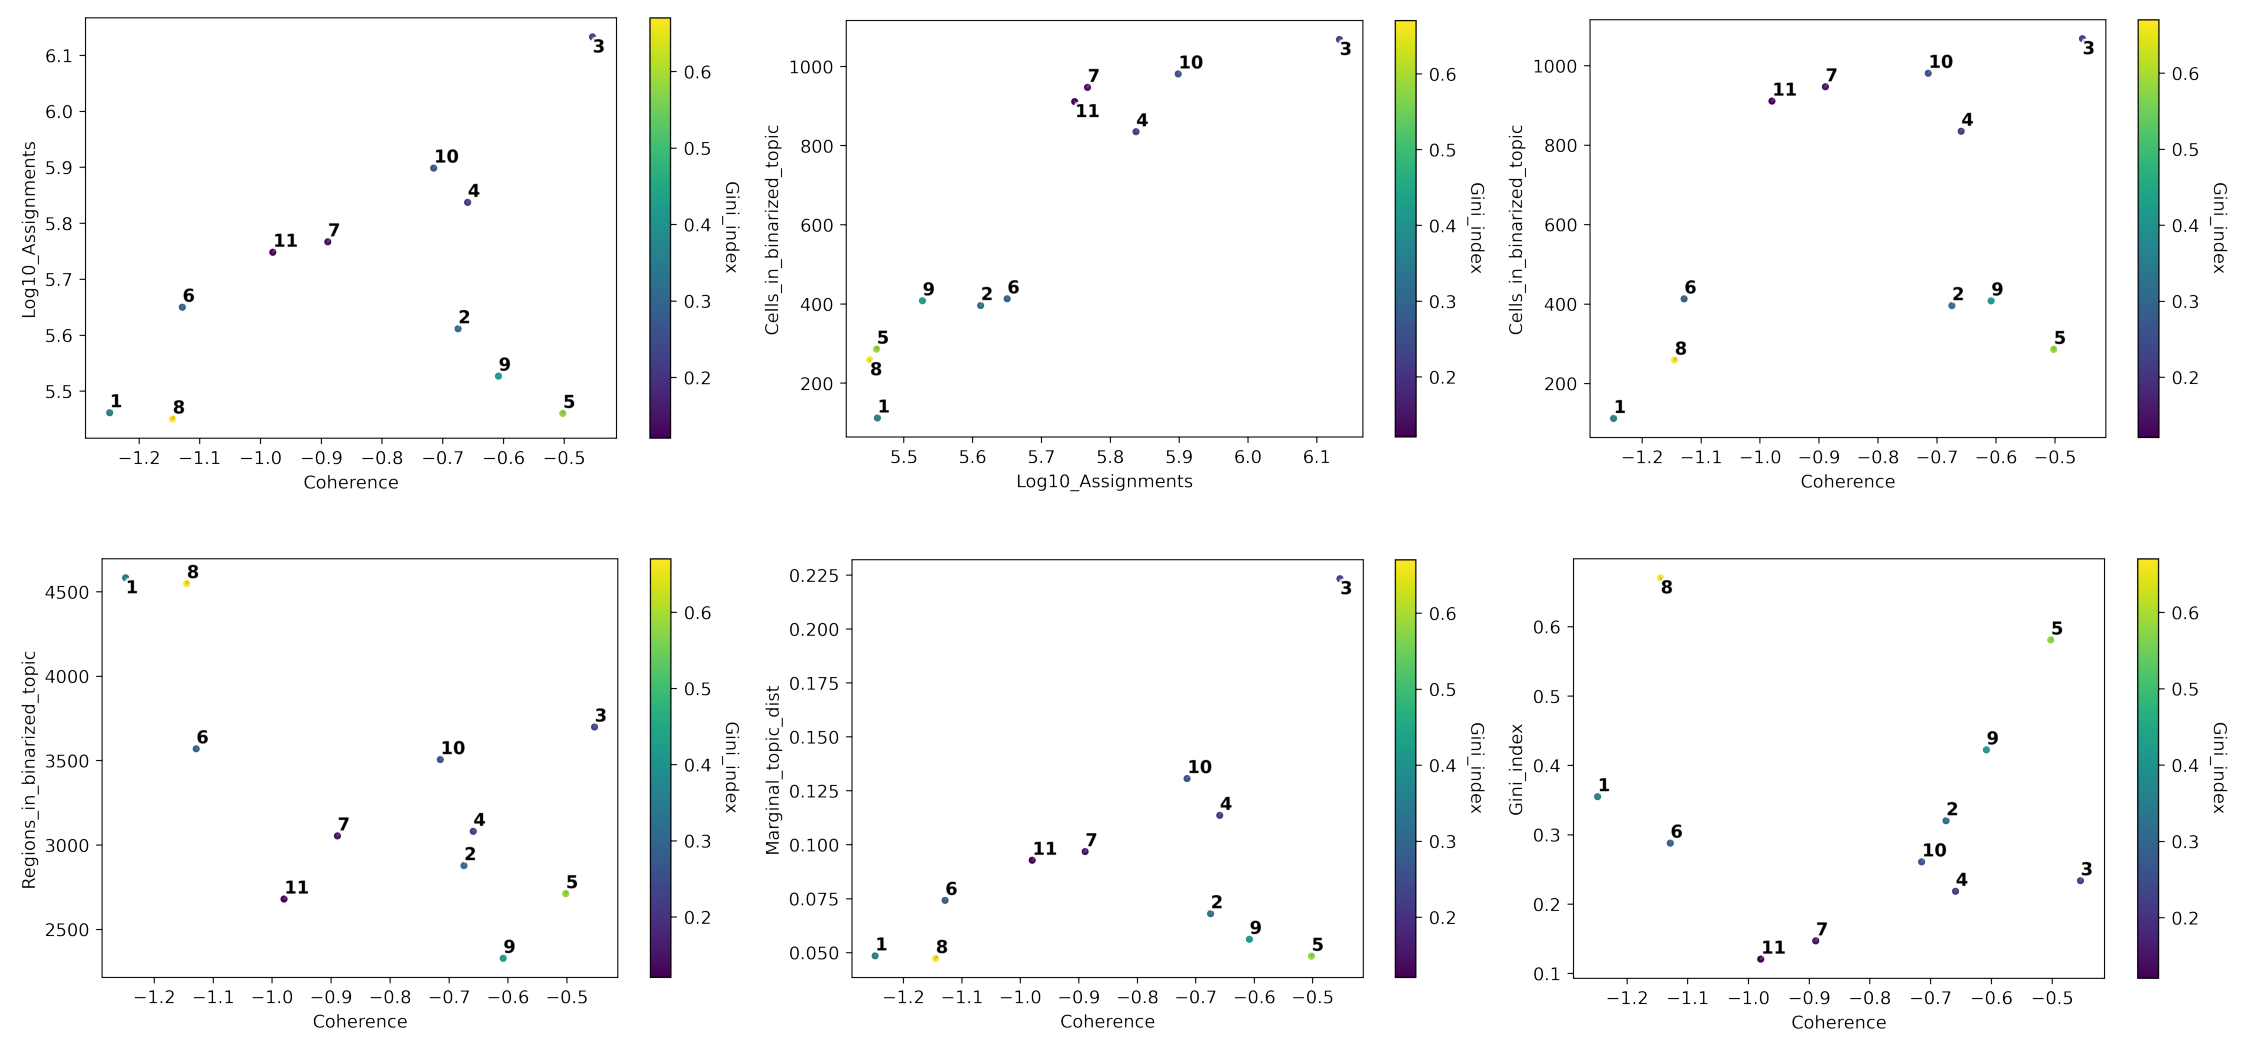

2022-12-19 21:43:11,634 cisTopic     INFO     Imputing drop-outs
2022-12-19 21:43:11,989 cisTopic     INFO     Scaling
2022-12-19 21:43:12,407 cisTopic     INFO     Keep non zero rows
2022-12-19 21:43:12,986 cisTopic     INFO     Imputed accessibility sparsity: 0.38081720750551873
2022-12-19 21:43:12,988 cisTopic     INFO     Create CistopicImputedFeatures object
2022-12-19 21:43:12,989 cisTopic     INFO     Done!
2022-12-19 21:43:12,990 cisTopic     INFO     Normalizing imputed data
2022-12-19 21:43:14,578 cisTopic     INFO     Done!
2022-12-19 21:43:15,950 cisTopic     INFO     Calculating mean
2022-12-19 21:43:16,130 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

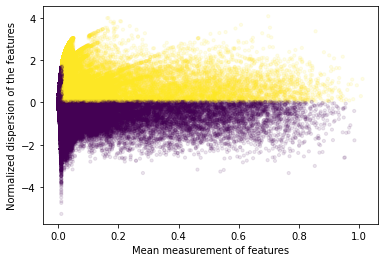

2022-12-19 21:43:21,683 cisTopic     INFO     Done!
Found 28839 variable regions


2022-12-19 21:43:24,702	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8266


(markers_ray pid=3383616) 2022-12-19 21:43:28,460 cisTopic     INFO     Formatting data for B cell
(markers_ray pid=3383623) 2022-12-19 21:43:28,468 cisTopic     INFO     Formatting data for CD14+ monocyte
(markers_ray pid=3383625) 2022-12-19 21:43:28,684 cisTopic     INFO     Formatting data for CD4+ T cell
(markers_ray pid=3383627) 2022-12-19 21:43:28,731 cisTopic     INFO     Formatting data for Natural killer cell
(markers_ray pid=3383621) 2022-12-19 21:43:28,749 cisTopic     INFO     Formatting data for Cytotoxic T cell
(markers_ray pid=3383616) 2022-12-19 21:43:28,948 cisTopic     INFO     Computing p-value for B cell
(markers_ray pid=3383623) 2022-12-19 21:43:28,931 cisTopic     INFO     Computing p-value for CD14+ monocyte
(markers_ray pid=3383625) 2022-12-19 21:43:29,150 cisTopic     INFO     Computing p-value for CD4+ T cell
(markers_ray pid=3383627) 2022-12-19 21:43:29,193 cisTopic     INFO     Computing p-value for Natural killer cell
(markers_ray pid=3383621) 2022-12-19 21

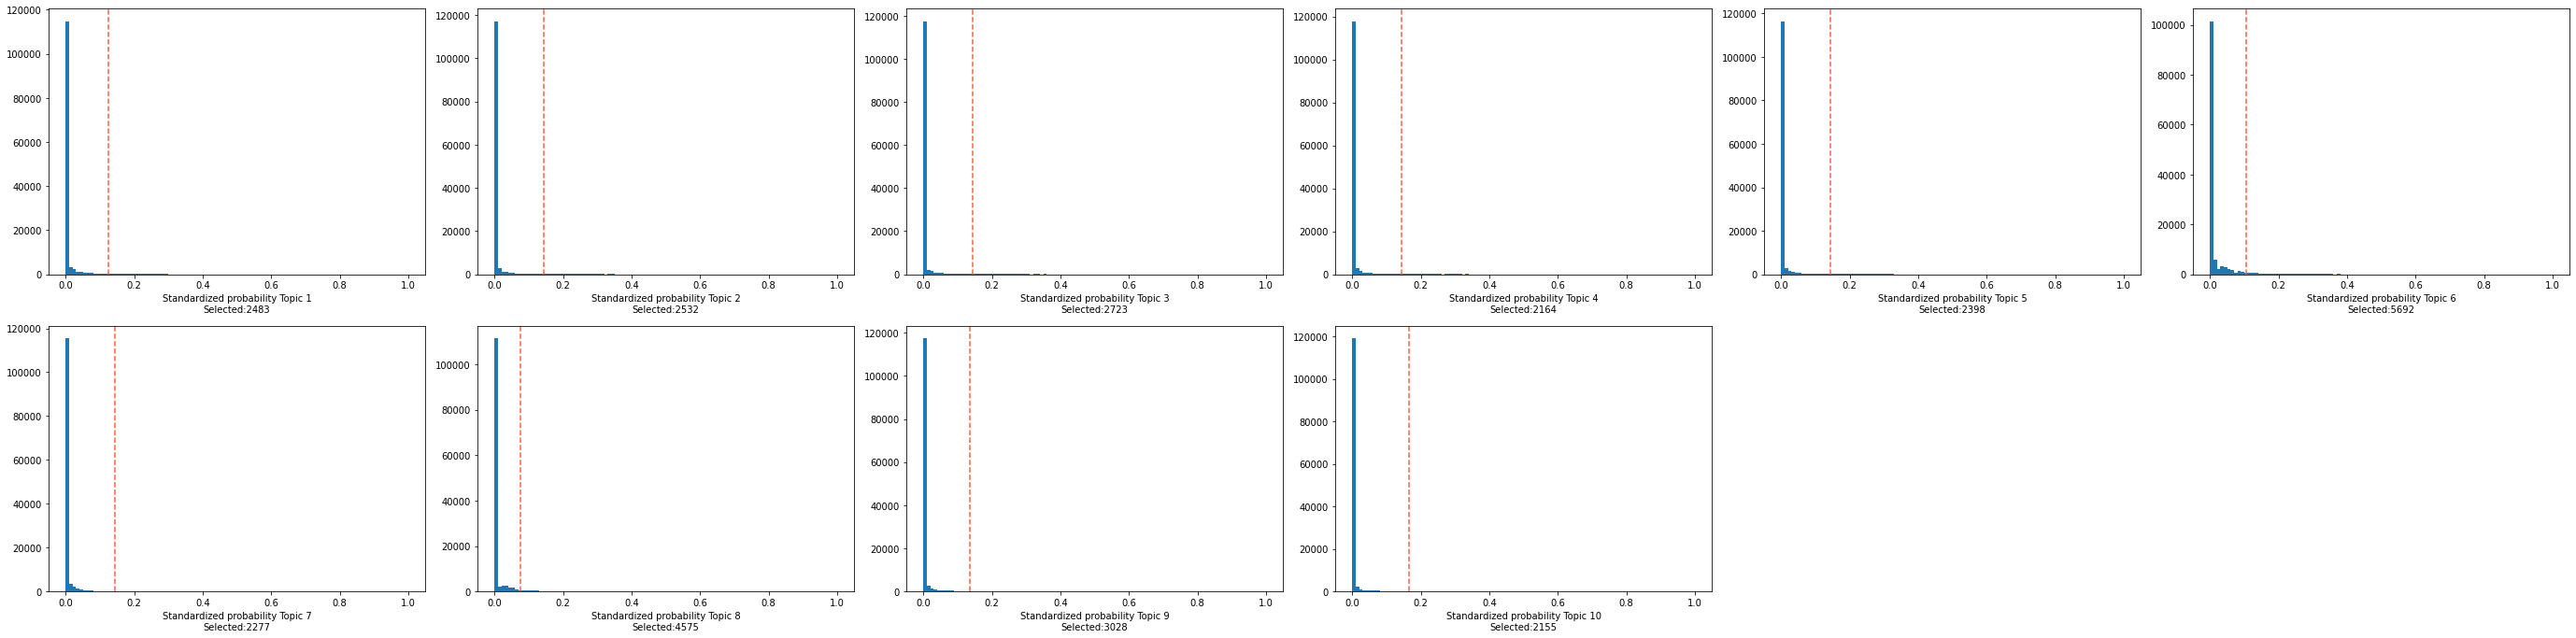

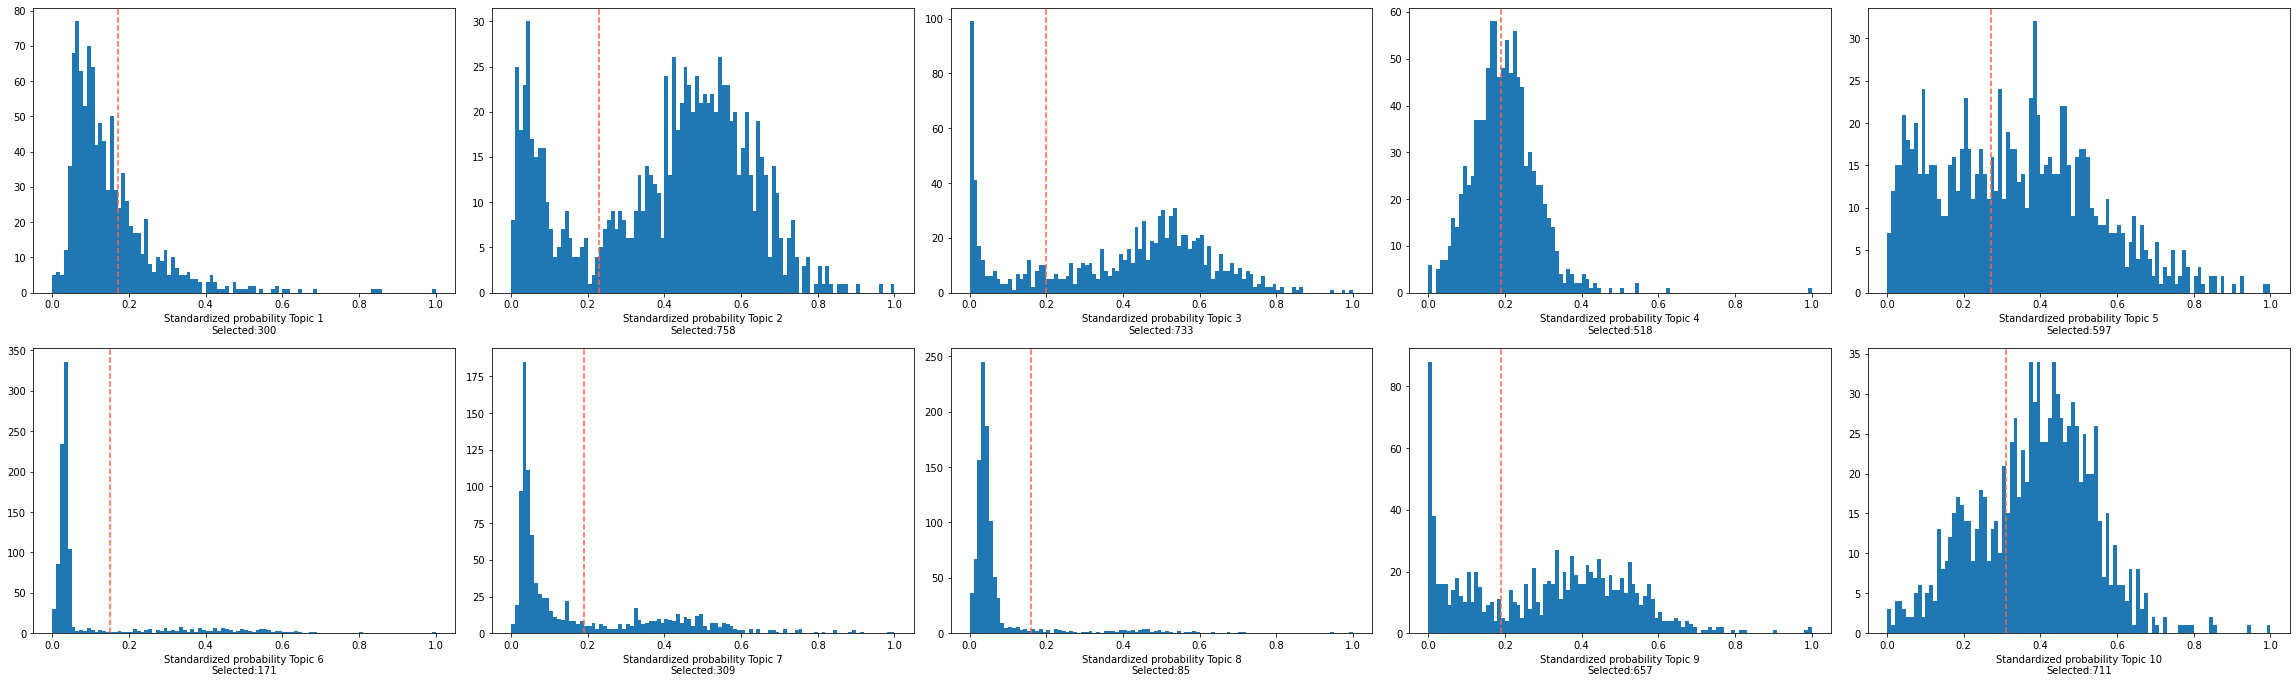

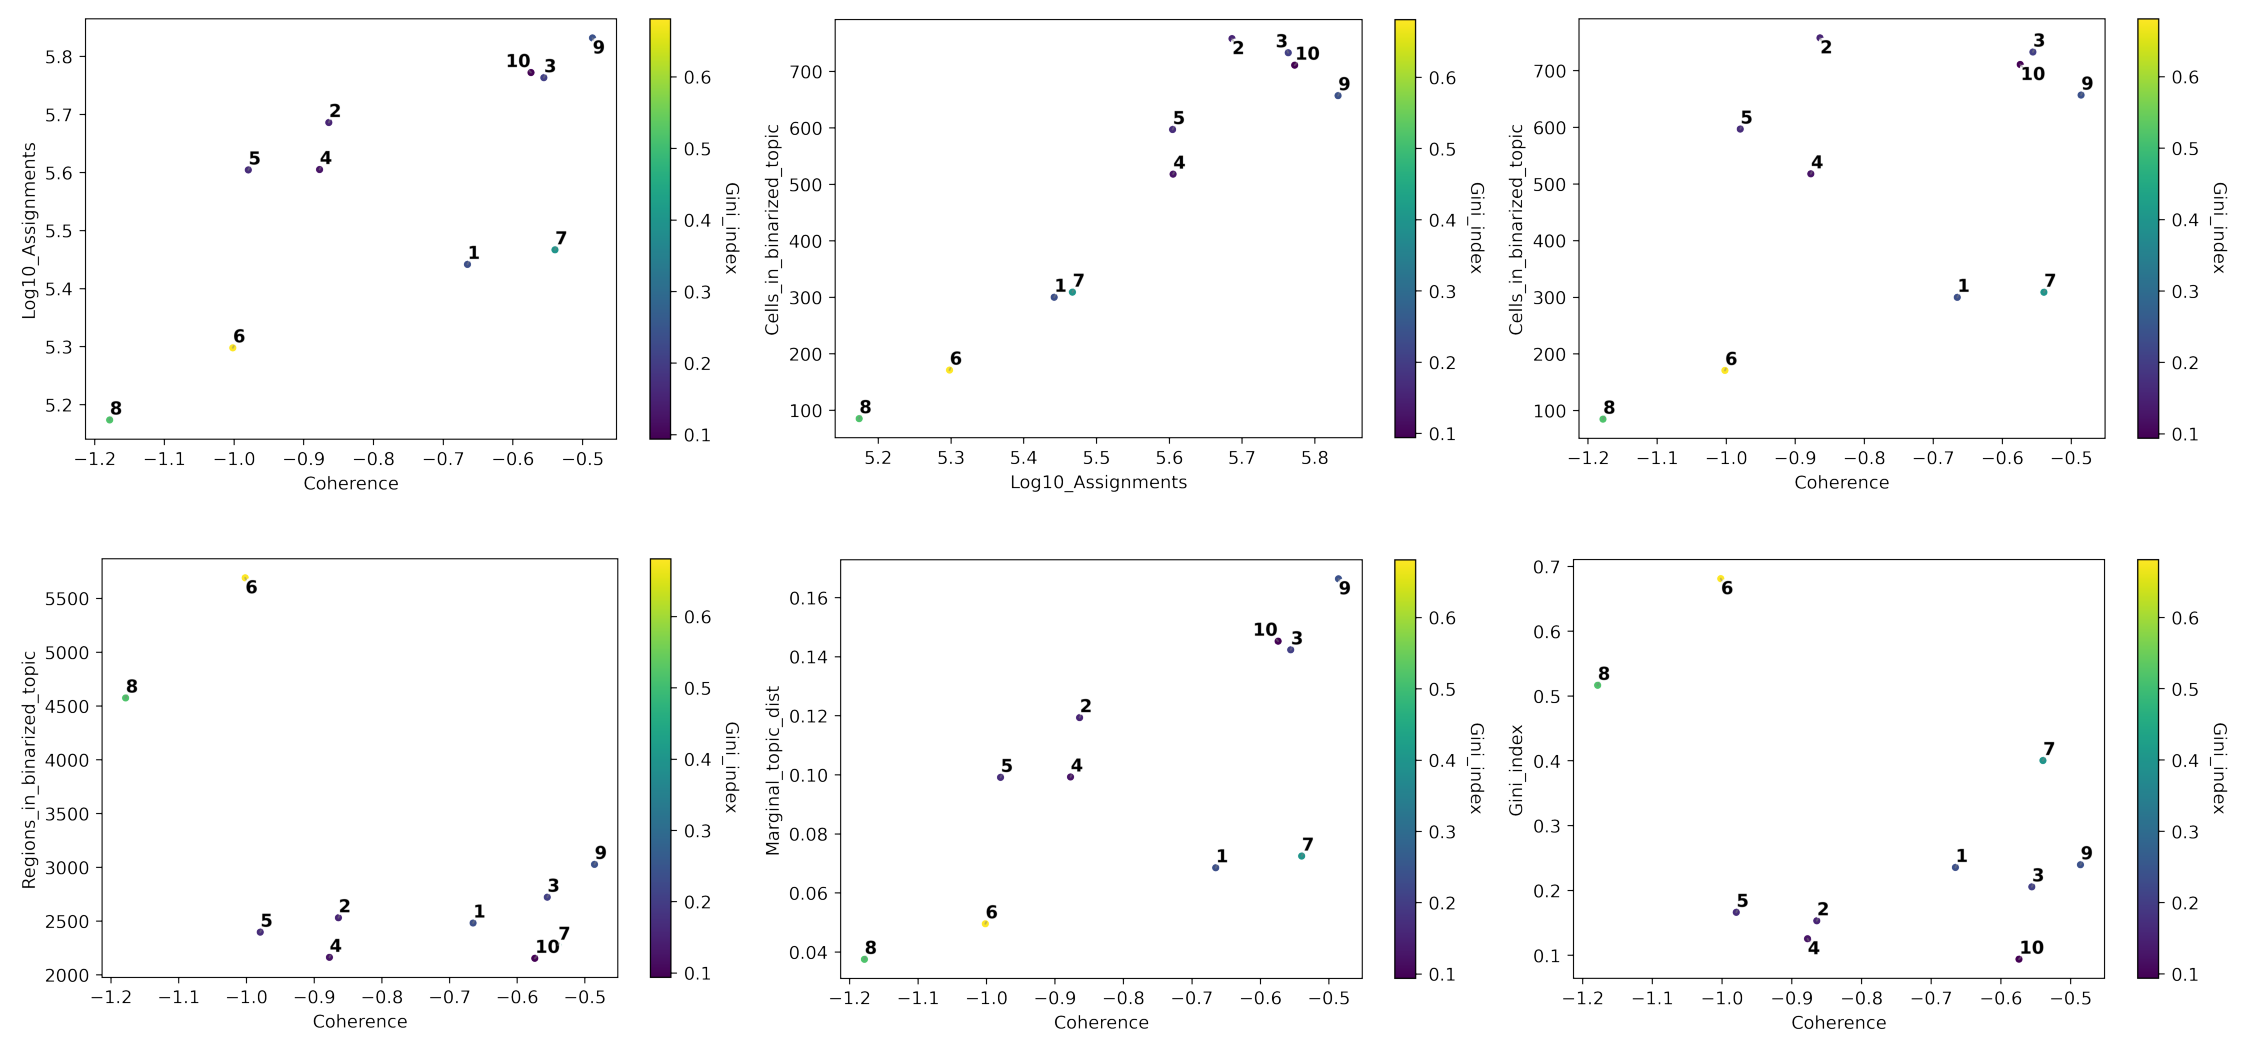

2022-12-19 21:44:09,669 cisTopic     INFO     Imputing drop-outs
2022-12-19 21:44:09,901 cisTopic     INFO     Scaling
2022-12-19 21:44:10,167 cisTopic     INFO     Keep non zero rows
2022-12-19 21:44:10,555 cisTopic     INFO     Imputed accessibility sparsity: 0.3554313420109282
2022-12-19 21:44:10,556 cisTopic     INFO     Create CistopicImputedFeatures object
2022-12-19 21:44:10,557 cisTopic     INFO     Done!
2022-12-19 21:44:10,560 cisTopic     INFO     Normalizing imputed data
2022-12-19 21:44:11,557 cisTopic     INFO     Done!
2022-12-19 21:44:12,462 cisTopic     INFO     Calculating mean
2022-12-19 21:44:12,581 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

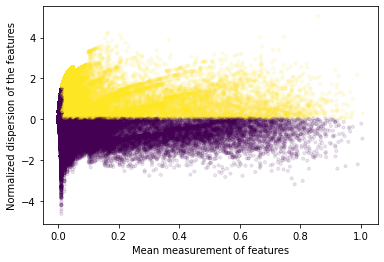

2022-12-19 21:44:17,631 cisTopic     INFO     Done!
Found 26028 variable regions


2022-12-19 21:44:20,537	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=3384508) 2022-12-19 21:44:24,361 cisTopic     INFO     Formatting data for CD14+ monocyte
(markers_ray pid=3384510) 2022-12-19 21:44:24,410 cisTopic     INFO     Formatting data for CD4+ T cell
(markers_ray pid=3384518) 2022-12-19 21:44:24,474 cisTopic     INFO     Formatting data for B cell
(markers_ray pid=3384508) 2022-12-19 21:44:24,605 cisTopic     INFO     Computing p-value for CD14+ monocyte
(markers_ray pid=3384510) 2022-12-19 21:44:24,655 cisTopic     INFO     Computing p-value for CD4+ T cell
(markers_ray pid=3384513) 2022-12-19 21:44:24,639 cisTopic     INFO     Formatting data for Natural killer cell
(markers_ray pid=3384509) 2022-12-19 21:44:24,637 cisTopic     INFO     Formatting data for Cytotoxic T cell
(markers_ray pid=3384518) 2022-12-19 21:44:24,733 cisTopic     INFO     Computing p-value for B cell
(markers_ray pid=3384513) 2022-12-19 21:44:24,894 cisTopic     INFO     Computing p-value for Natural killer cell
(markers_ray pid=3384509) 2022-12-19 21

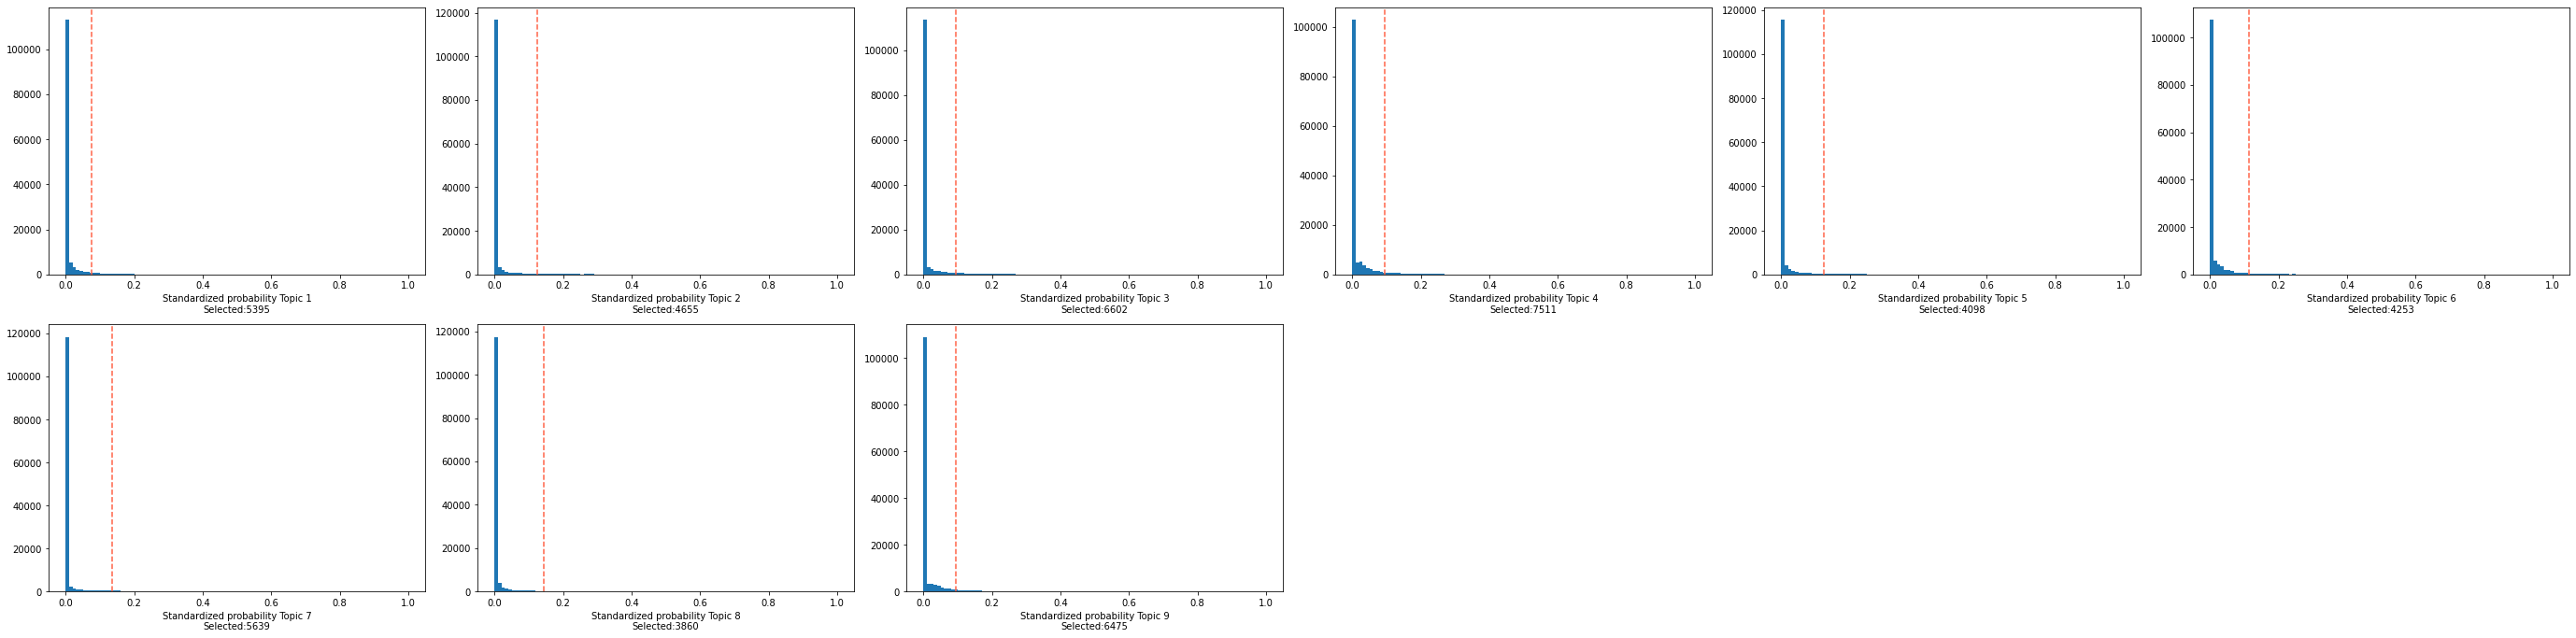

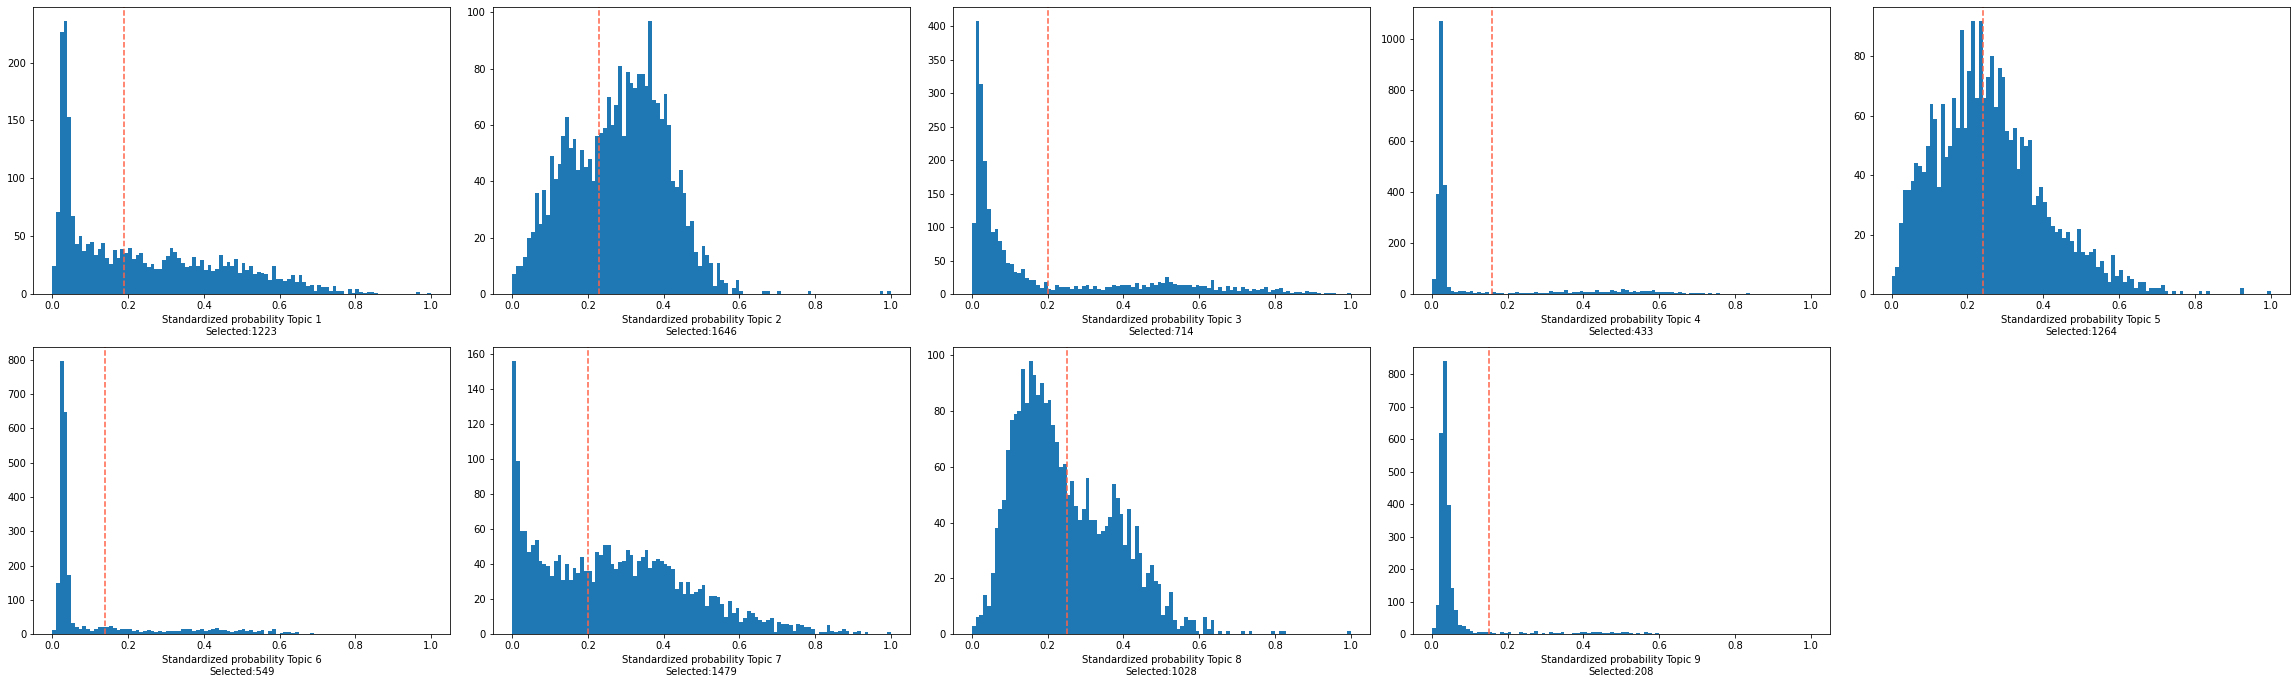

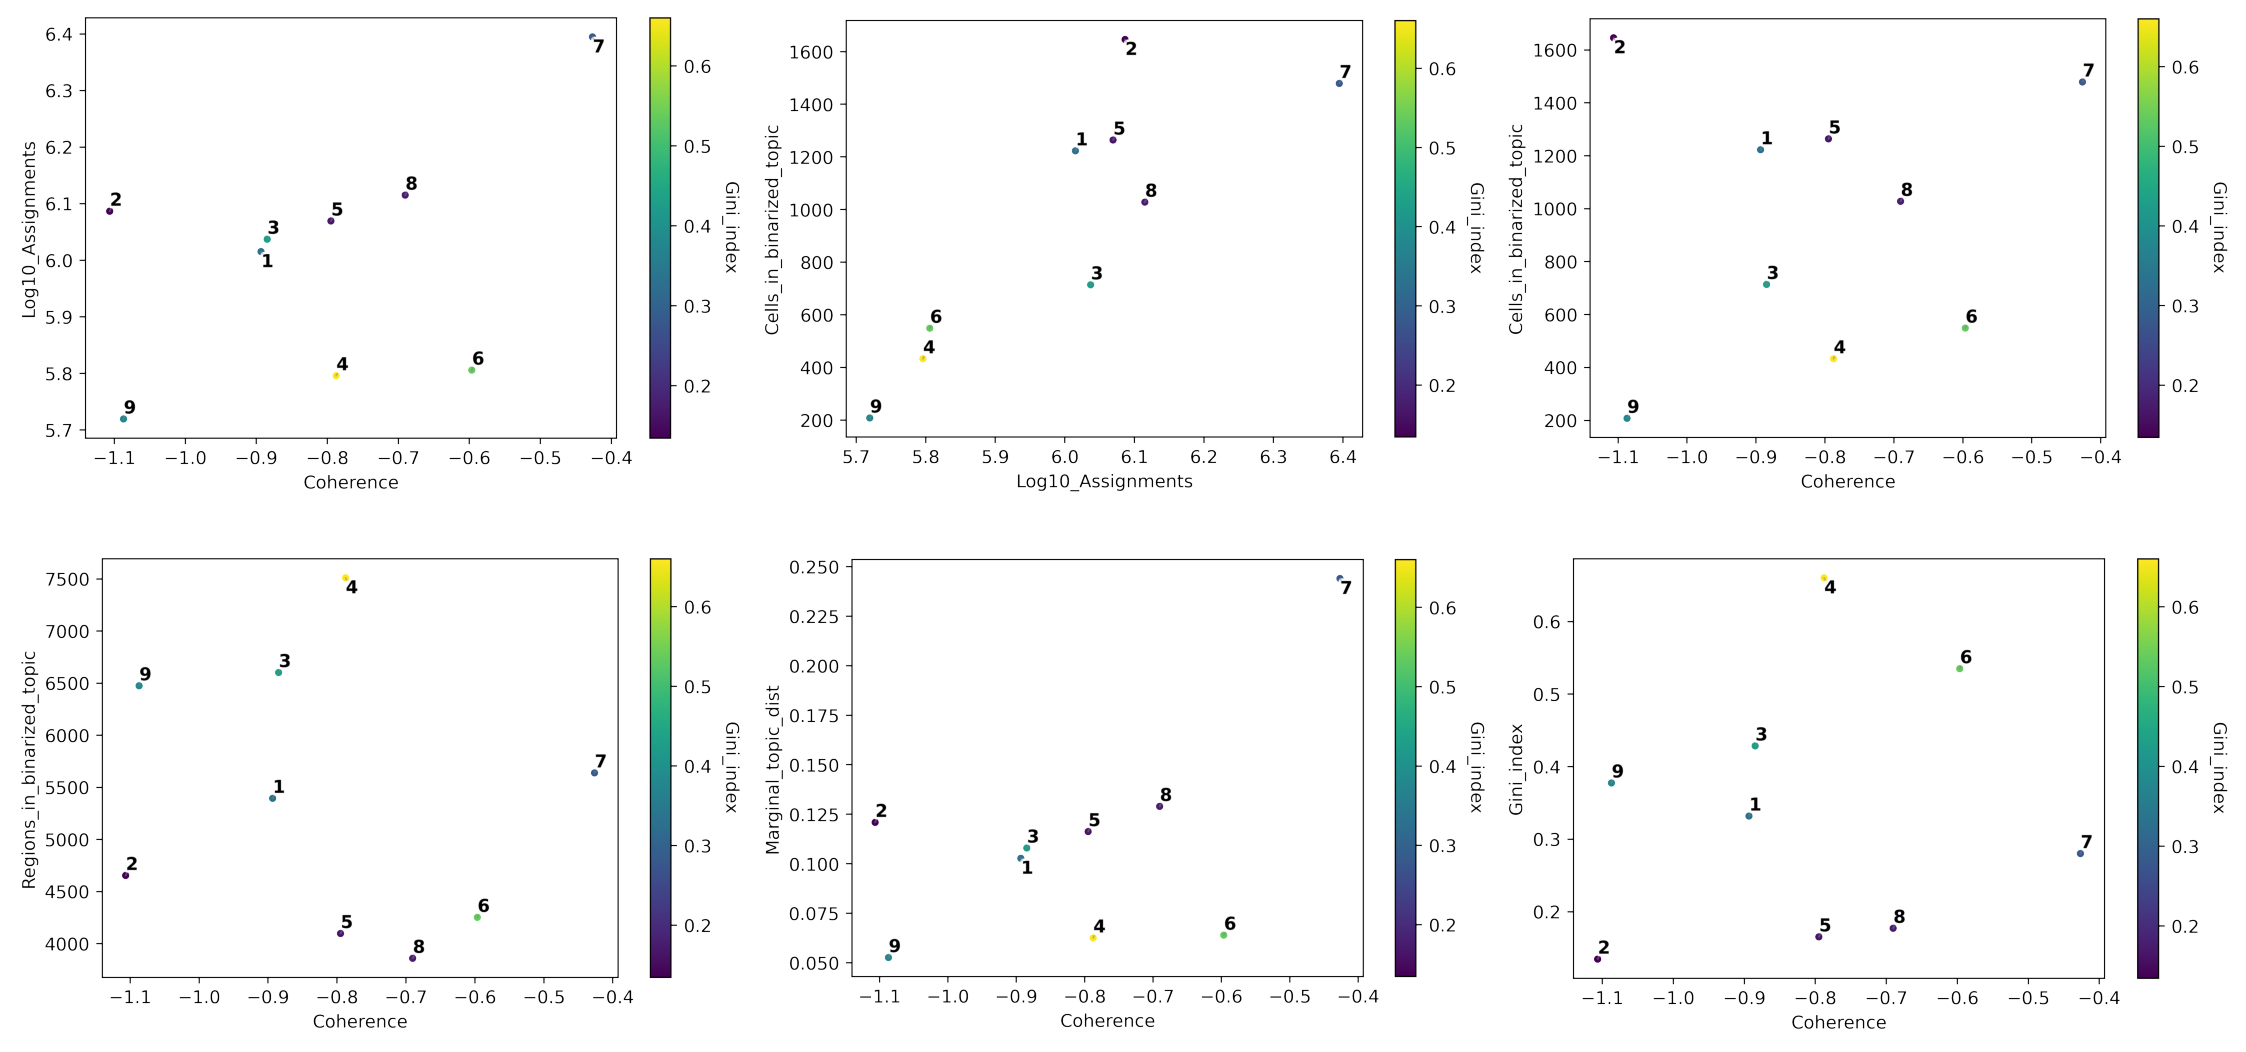

2022-12-19 21:45:01,653 cisTopic     INFO     Imputing drop-outs
2022-12-19 21:45:02,281 cisTopic     INFO     Scaling
2022-12-19 21:45:02,930 cisTopic     INFO     Keep non zero rows
2022-12-19 21:45:03,905 cisTopic     INFO     Imputed accessibility sparsity: 0.40746552964306837
2022-12-19 21:45:03,906 cisTopic     INFO     Create CistopicImputedFeatures object
2022-12-19 21:45:03,908 cisTopic     INFO     Done!
2022-12-19 21:45:03,910 cisTopic     INFO     Normalizing imputed data
2022-12-19 21:45:06,578 cisTopic     INFO     Done!
2022-12-19 21:45:08,900 cisTopic     INFO     Calculating mean
2022-12-19 21:45:09,222 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

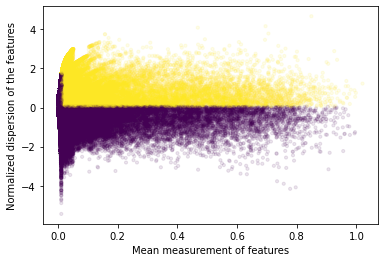

2022-12-19 21:45:15,715 cisTopic     INFO     Done!
Found 28483 variable regions


2022-12-19 21:45:19,035	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=3385333) 2022-12-19 21:45:23,038 cisTopic     INFO     Formatting data for B cell
(markers_ray pid=3385328) 2022-12-19 21:45:23,068 cisTopic     INFO     Formatting data for CD14+ monocyte
(markers_ray pid=3385332) 2022-12-19 21:45:23,309 cisTopic     INFO     Formatting data for Cytotoxic T cell
(markers_ray pid=3385329) 2022-12-19 21:45:23,309 cisTopic     INFO     Formatting data for CD4+ T cell
(markers_ray pid=3385326) 2022-12-19 21:45:23,424 cisTopic     INFO     Formatting data for Natural killer cell
(markers_ray pid=3385328) 2022-12-19 21:45:23,943 cisTopic     INFO     Computing p-value for CD14+ monocyte
(markers_ray pid=3385333) 2022-12-19 21:45:24,012 cisTopic     INFO     Computing p-value for B cell
(markers_ray pid=3385332) 2022-12-19 21:45:24,174 cisTopic     INFO     Computing p-value for Cytotoxic T cell
(markers_ray pid=3385329) 2022-12-19 21:45:24,287 cisTopic     INFO     Computing p-value for CD4+ T cell
(markers_ray pid=3385326) 2022-12-19 21:45

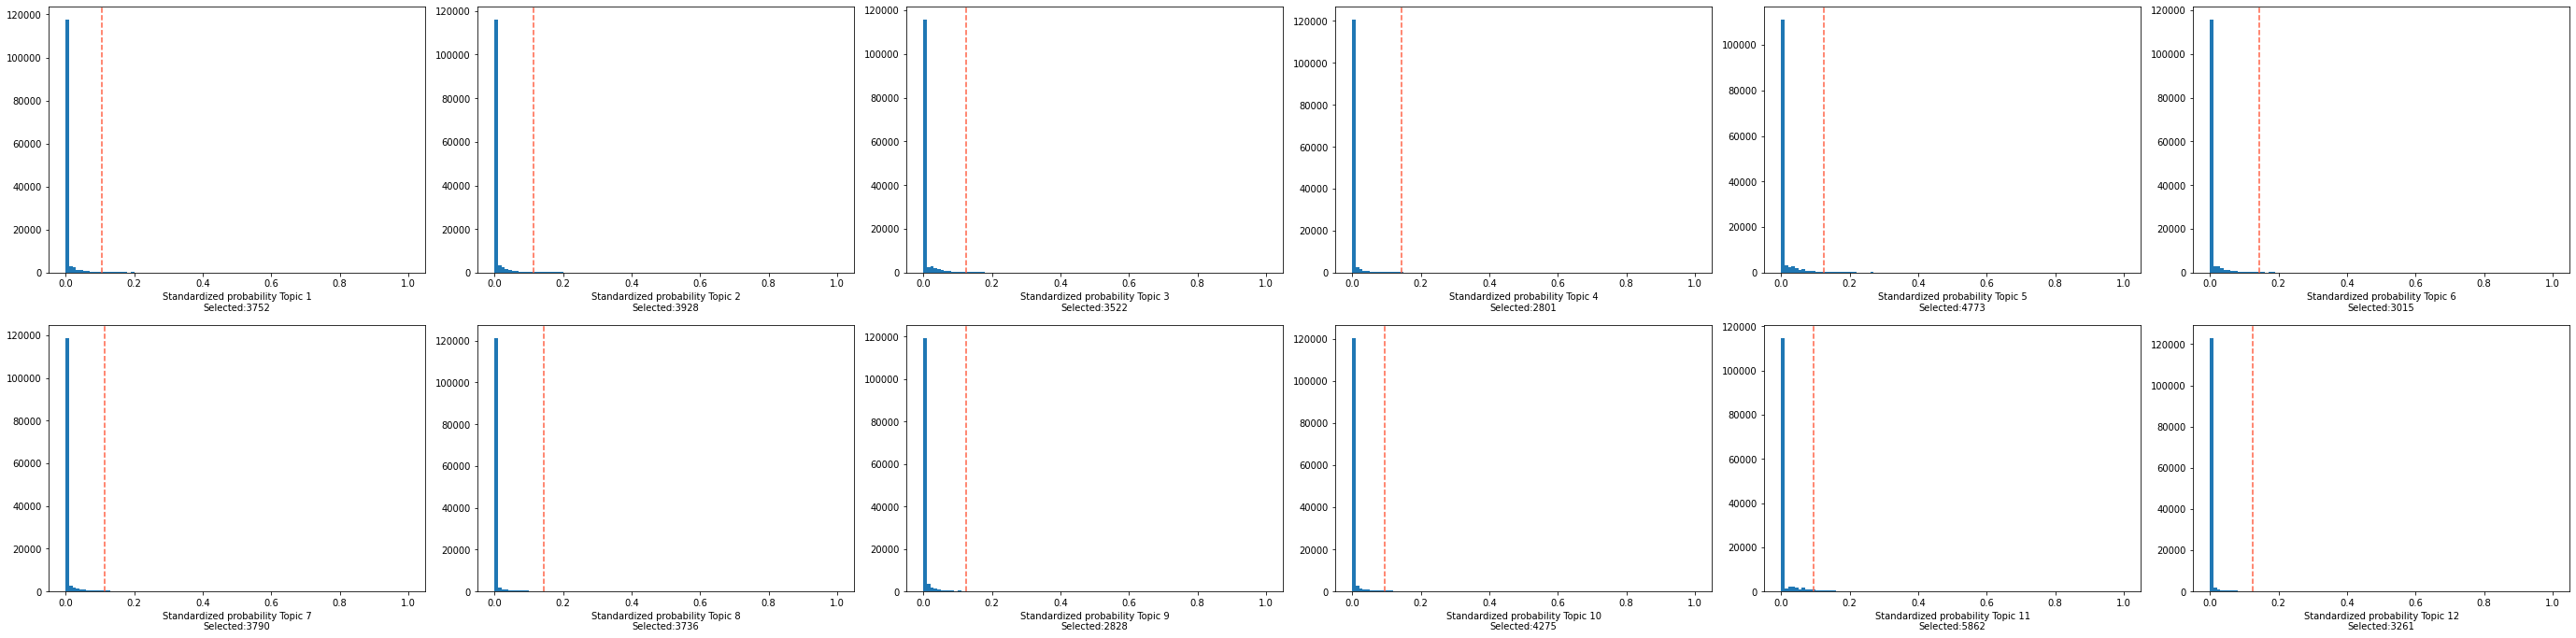

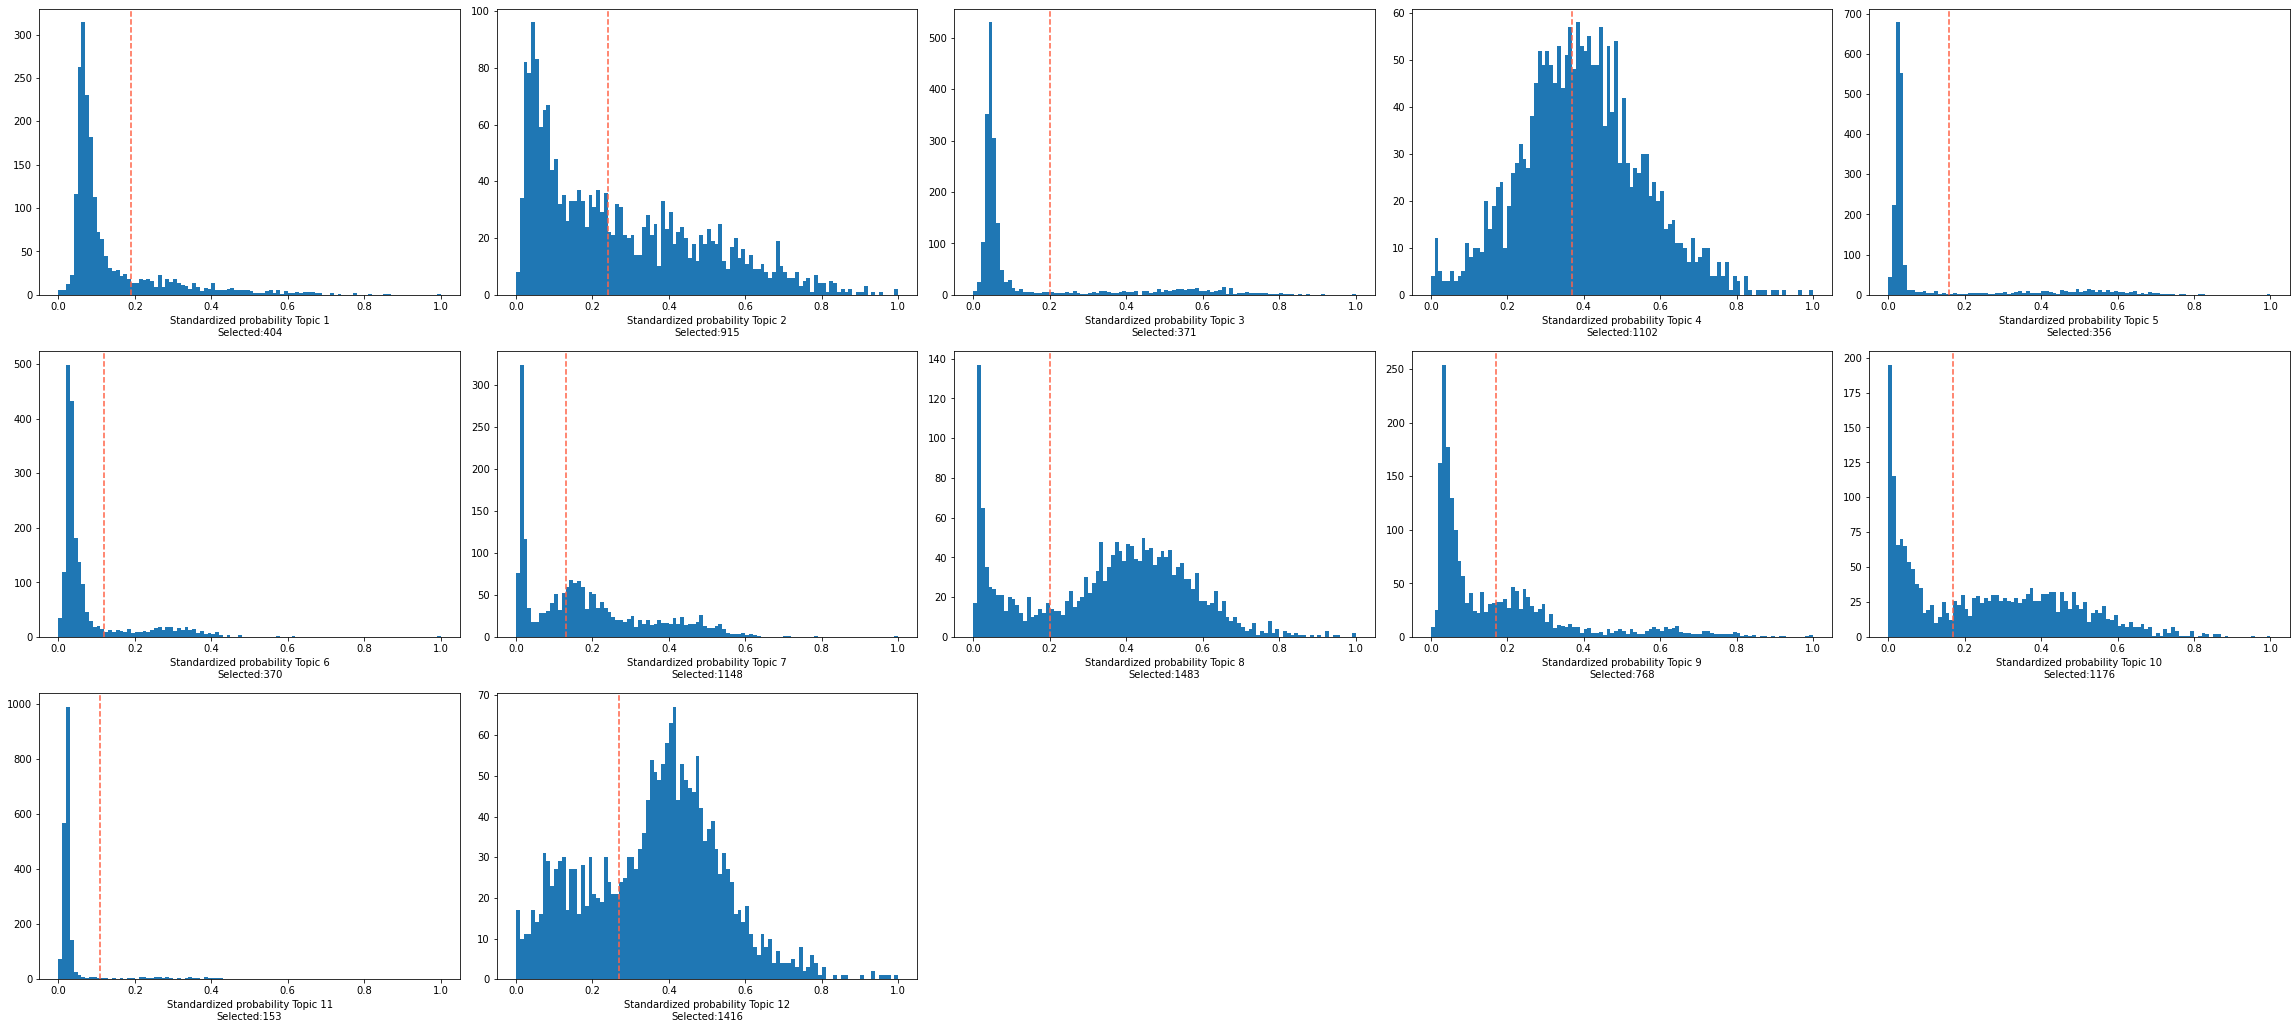

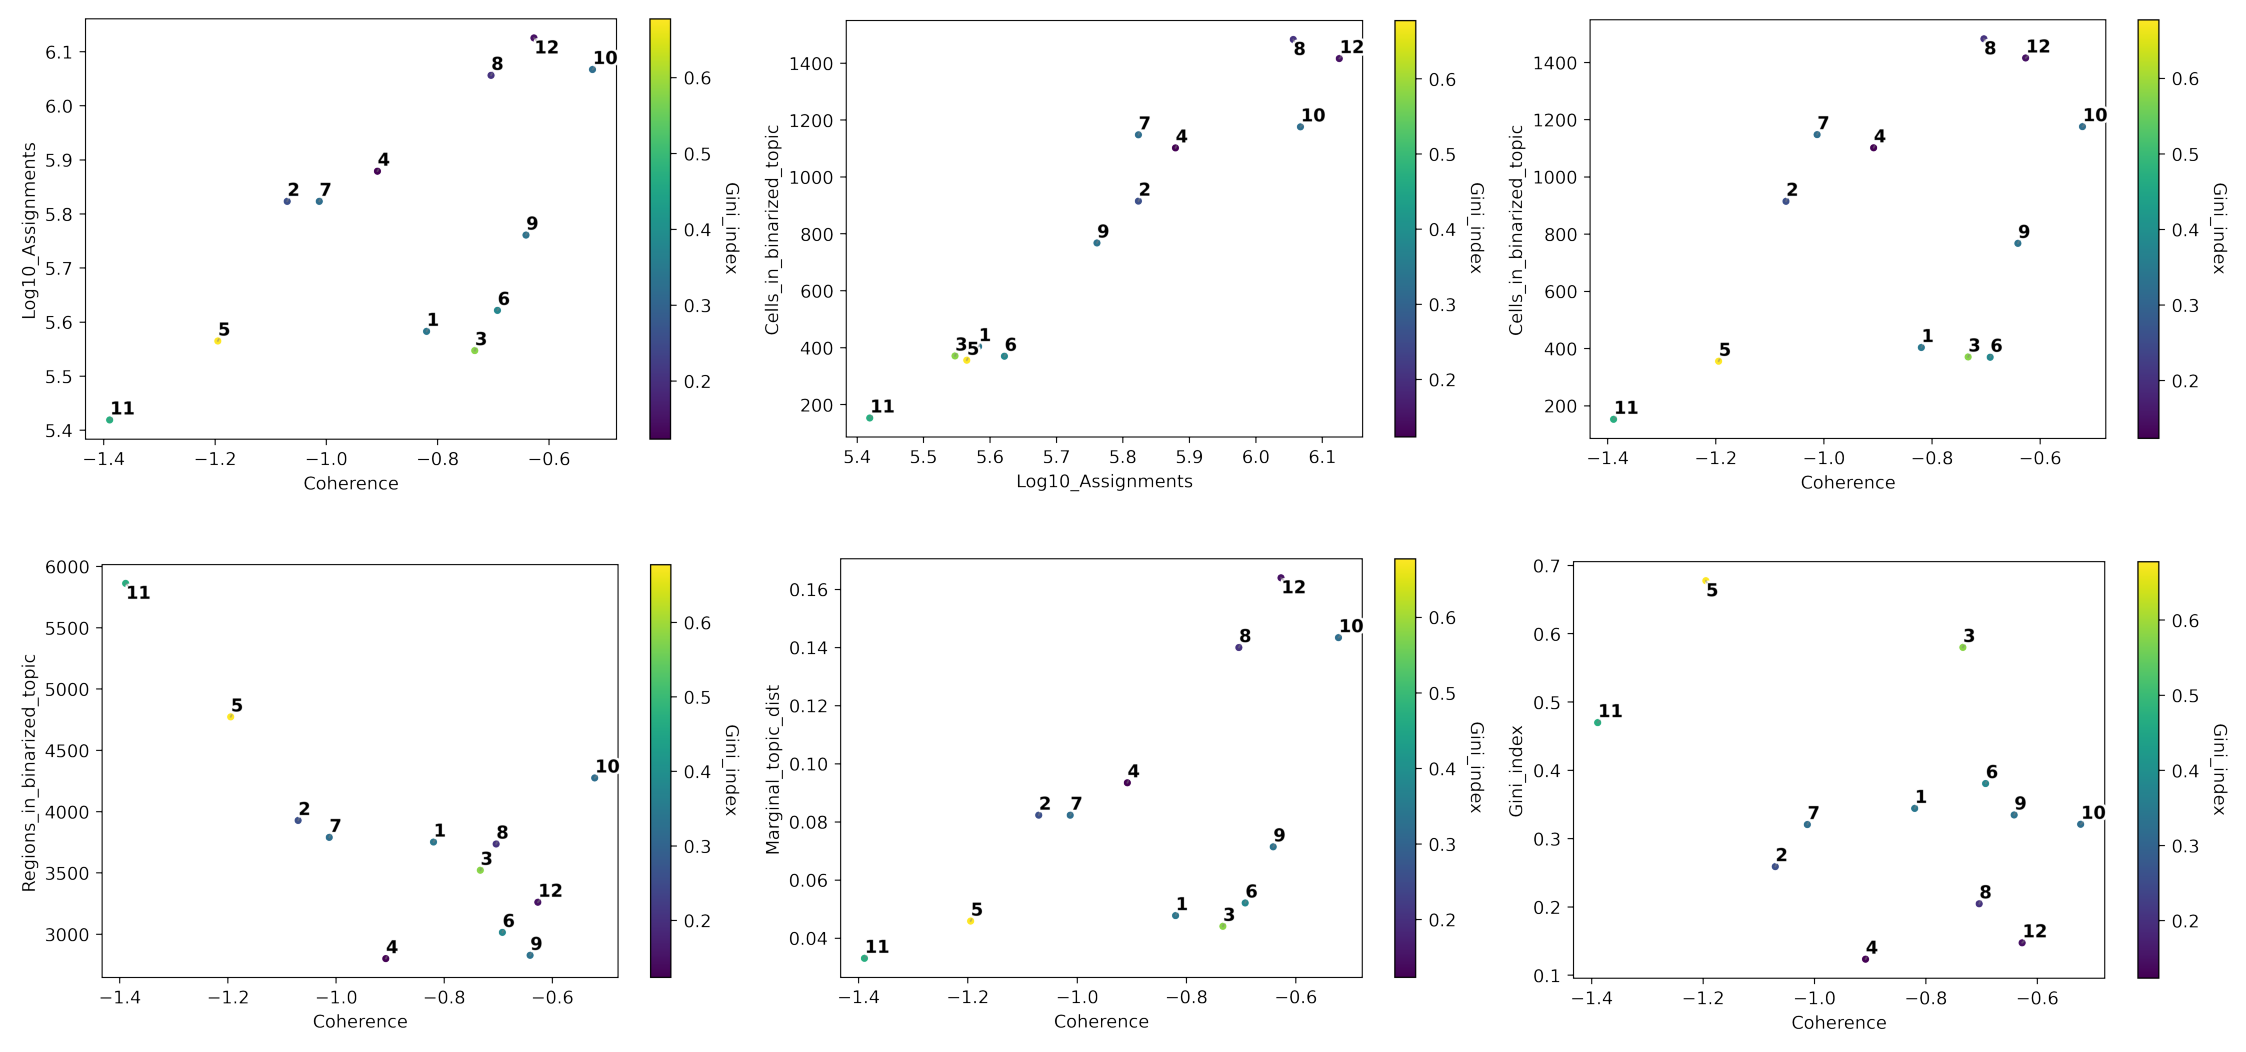

2022-12-19 21:46:10,405 cisTopic     INFO     Imputing drop-outs
2022-12-19 21:46:10,910 cisTopic     INFO     Scaling
2022-12-19 21:46:11,465 cisTopic     INFO     Keep non zero rows
2022-12-19 21:46:12,262 cisTopic     INFO     Imputed accessibility sparsity: 0.40149309827093527
2022-12-19 21:46:12,263 cisTopic     INFO     Create CistopicImputedFeatures object
2022-12-19 21:46:12,264 cisTopic     INFO     Done!
2022-12-19 21:46:12,268 cisTopic     INFO     Normalizing imputed data
2022-12-19 21:46:14,451 cisTopic     INFO     Done!
2022-12-19 21:46:16,334 cisTopic     INFO     Calculating mean
2022-12-19 21:46:16,584 cisTopic     INFO     Calculating variance


<Figure size 432x288 with 0 Axes>

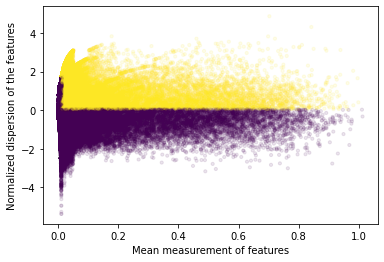

2022-12-19 21:46:22,726 cisTopic     INFO     Done!
Found 28713 variable regions


2022-12-19 21:46:25,837	INFO services.py:1470 -- View the Ray dashboard at http://127.0.0.1:8265


(markers_ray pid=3386931) 2022-12-19 21:46:29,545 cisTopic     INFO     Formatting data for B cell
(markers_ray pid=3386932) 2022-12-19 21:46:29,712 cisTopic     INFO     Formatting data for CD14+ monocyte
(markers_ray pid=3386939) 2022-12-19 21:46:29,821 cisTopic     INFO     Formatting data for Cytotoxic T cell
(markers_ray pid=3386934) 2022-12-19 21:46:29,735 cisTopic     INFO     Formatting data for CD4+ T cell
(markers_ray pid=3386943) 2022-12-19 21:46:30,006 cisTopic     INFO     Formatting data for Natural killer cell
(markers_ray pid=3386931) 2022-12-19 21:46:30,256 cisTopic     INFO     Computing p-value for B cell
(markers_ray pid=3386932) 2022-12-19 21:46:30,410 cisTopic     INFO     Computing p-value for CD14+ monocyte
(markers_ray pid=3386934) 2022-12-19 21:46:30,426 cisTopic     INFO     Computing p-value for CD4+ T cell
(markers_ray pid=3386939) 2022-12-19 21:46:30,726 cisTopic     INFO     Computing p-value for Cytotoxic T cell
(markers_ray pid=3386943) 2022-12-19 21:46

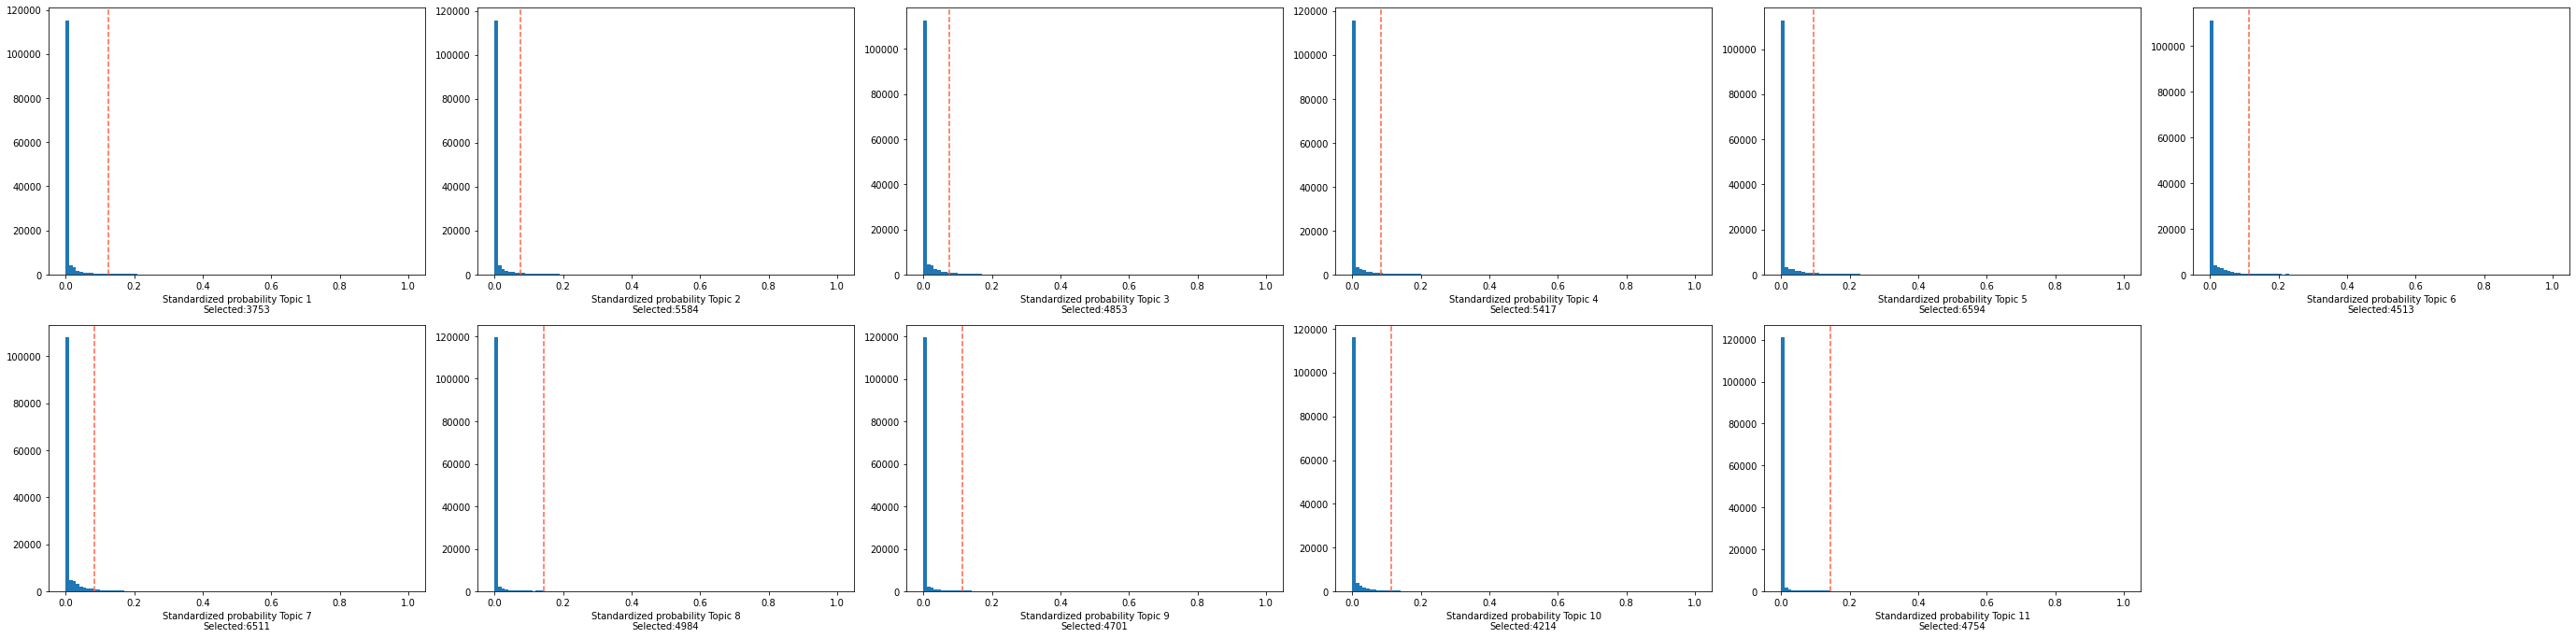

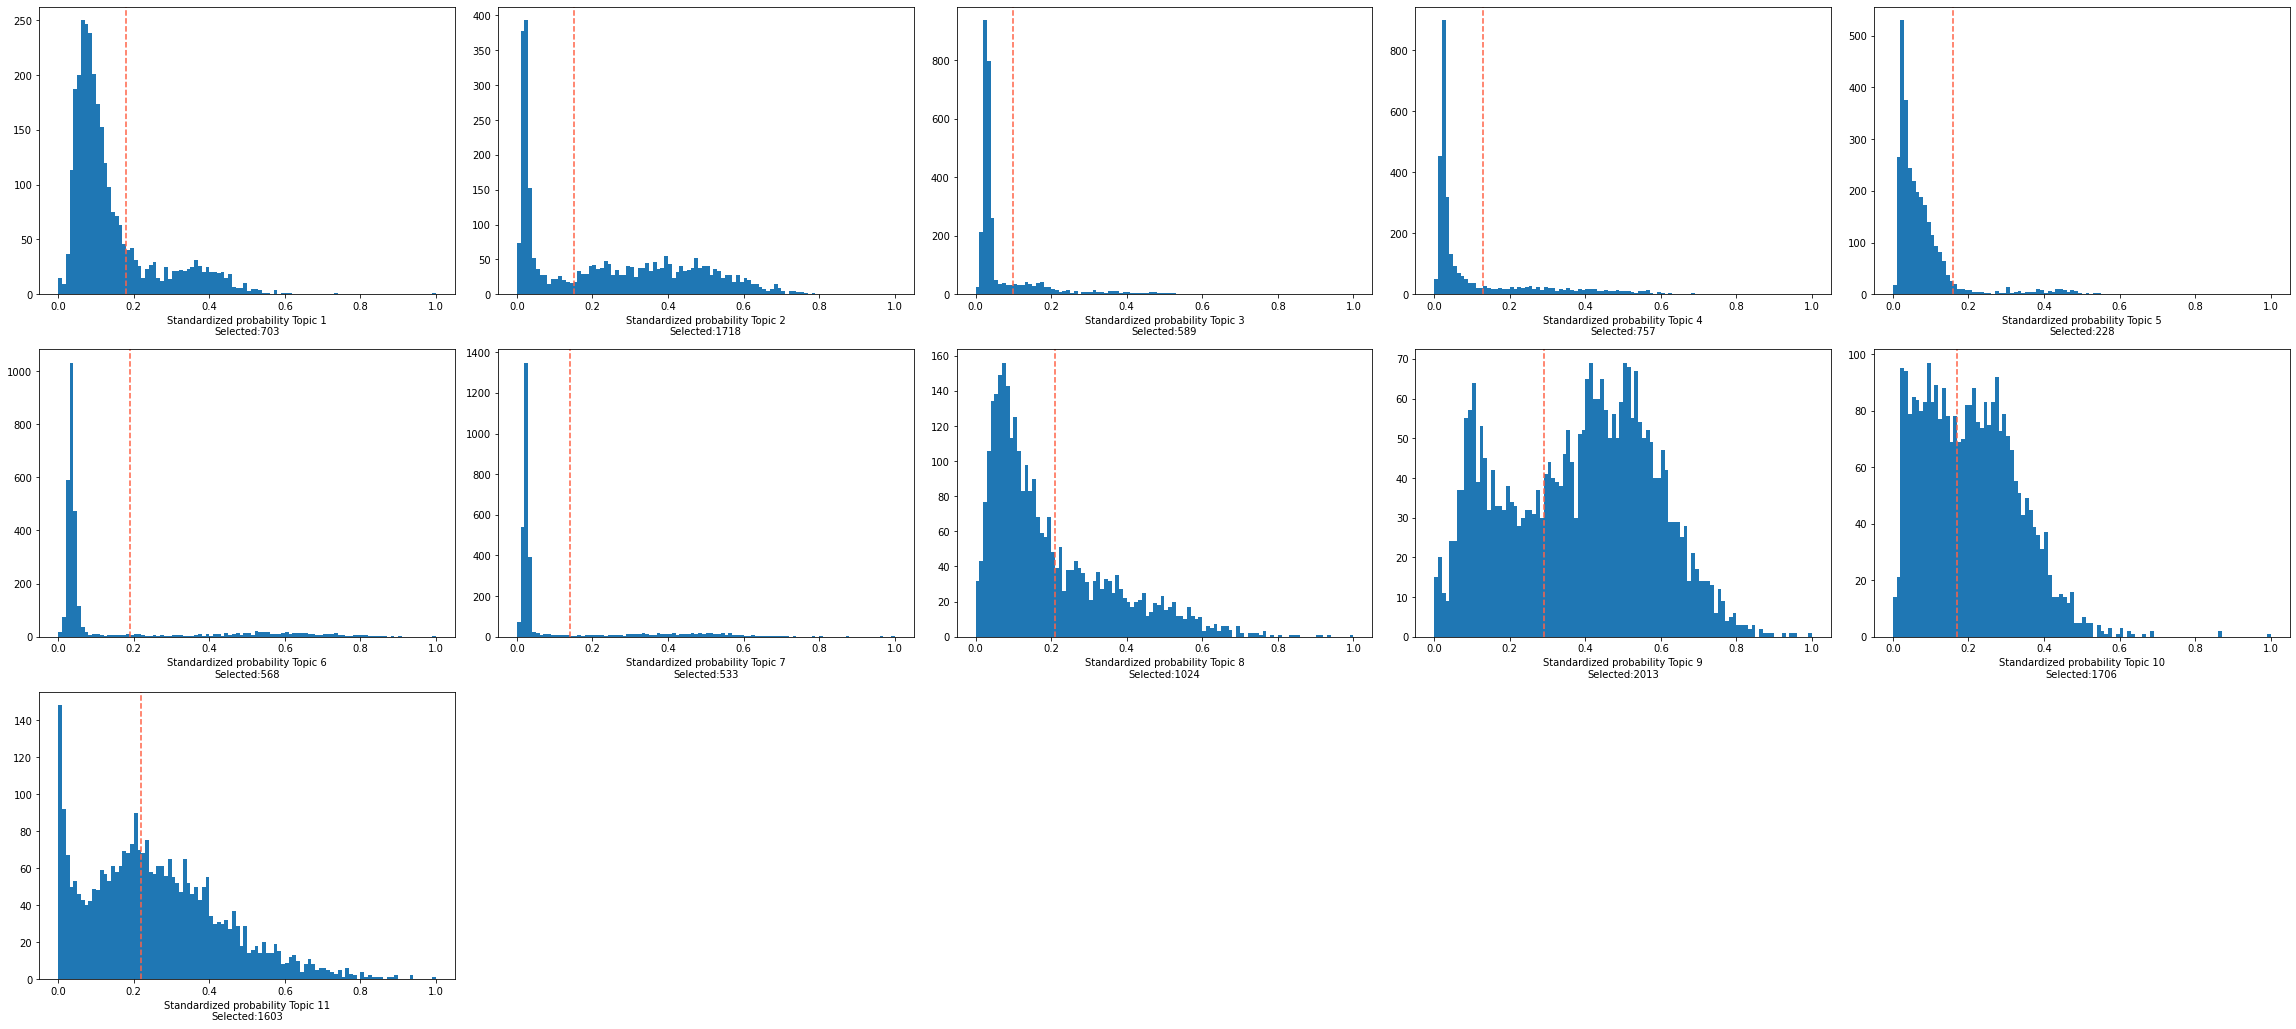

In [ ]:
for sample in cistopic_obj_path_dict.keys():
    # for sample  in ['SAN_10xmultiome_1.FIXEDCELLS']:
    path = cistopic_obj_path_dict[sample]
    if not os.path.exists(f"downstream_analysis/DARs/{sample}"):
        if os.path.isfile(path):
            print(f"Loading {path}")
            with open(path, "rb") as f:
                cto = pickle.load(f)

            cto.cell_names = cto.cell_data.index
            if [x.split("-")[0] for x in cto.selected_model.cell_topic.columns] == [
                x.split("___")[0] for x in list(cto.cell_names)
            ]:
                cto.selected_model.cell_topic.columns = list(cto.cell_names)

            region_bin_topics = binarize_topics(
                cto,
                method="otsu",
                ntop=3000,
                plot=True,
                num_columns=6,
                save=f"plots_qc/{sample}__topic_region_binarized.png",
            )

            with open(
                f"downstream_analysis/binarized_topics/{sample}__topic_region_binarized.pkl",
                "wb",
            ) as f:
                pickle.dump(region_bin_topics, f, protocol=4)

            binarized_cell_topics = binarize_topics(
                cto,
                target="cell",
                method="li",
                plot=True,
                num_columns=5,
                nbins=100,
                save=f"plots_qc/{sample}__cells_topic_binarized.png",
            )

            with open(
                f"downstream_analysis/binarized_topics/{sample}__cells_topic_binarized.pkl",
                "wb",
            ) as f:
                pickle.dump(region_bin_topics, f, protocol=4)

            topic_qc_metrics = compute_topic_metrics(cto)

            with open(
                f"downstream_analysis/binarized_topics/{sample}__topic_qc.pkl", "wb"
            ) as f:
                pickle.dump(topic_qc_metrics, f, protocol=4)

            fig_dict = {
                "CoherenceVSAssignments": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Coherence",
                    var_y="Log10_Assignments",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
                "AssignmentsVSCells_in_bin": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Log10_Assignments",
                    var_y="Cells_in_binarized_topic",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
                "CoherenceVSCells_in_bin": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Coherence",
                    var_y="Cells_in_binarized_topic",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
                "CoherenceVSRegions_in_bin": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Coherence",
                    var_y="Regions_in_binarized_topic",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
                "CoherenceVSMarginal_dist": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Coherence",
                    var_y="Marginal_topic_dist",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
                "CoherenceVSGini_index": plot_topic_qc(
                    topic_qc_metrics,
                    var_x="Coherence",
                    var_y="Gini_index",
                    var_color="Gini_index",
                    plot=False,
                    return_fig=True,
                ),
            }

            fig = plt.figure(figsize=(40, 43))
            i = 1
            for fig_ in fig_dict.keys():
                plt.subplot(2, 3, i)
                img = fig2img(
                    fig_dict[fig_]
                )  # To convert figures to png to plot together, see .utils.py. This converts the figure to png.
                plt.imshow(img)
                plt.axis("off")
                i += 1
            plt.subplots_adjust(wspace=0, hspace=-0.70)
            # plt.tight_layout()
            plt.show()
            plt.savefig(
                f"plots_qc/{sample}__topic_qc_metrics.png", facecolor="white", dpi=150
            )

            topic_annot = topic_annotation(
                cto,
                annot_var="consensus_cell_type",
                binarized_cell_topic=binarized_cell_topics,
                general_topic_thr=0.2,
            )
            topic_qc_metrics = pd.concat(
                [
                    topic_annot[
                        [
                            "consensus_cell_type",
                            "Ratio_cells_in_topic",
                            "Ratio_group_in_population",
                        ]
                    ],
                    topic_qc_metrics,
                ],
                axis=1,
            )

            imputed_acc_obj = impute_accessibility(
                cto, selected_cells=None, selected_regions=None, scale_factor=10**6
            )

            normalized_imputed_acc_obj = normalize_scores(
                imputed_acc_obj, scale_factor=10**4
            )

            with open(
                f"downstream_analysis/imputed_acc_objs/{sample}__imputed_acc_obs.pkl",
                "wb",
            ) as f:
                pickle.dump(normalized_imputed_acc_obj, f, protocol=4)

            variable_regions = find_highly_variable_features(
                normalized_imputed_acc_obj,
                min_disp=0.05,
                min_mean=0.0125,
                max_mean=3,
                max_disp=np.inf,
                n_bins=20,
                n_top_features=None,
                plot=True,
                save=f"plots_qc/{sample}__HVR.png",
            )

            print(f"Found {len(variable_regions)} variable regions")
            with open(f"downstream_analysis/HVRs/{sample}__HVRs.bed", "w") as f:
                for line in [
                    x.replace(":", "\t").replace("-", "\t") for x in variable_regions
                ]:
                    f.write(f"{line}\n")

            with open(f"downstream_analysis/HVRs/{sample}__HVRs.pkl", "wb") as f:
                pickle.dump(variable_regions, f, protocol=4)

            os.mkdir(f"downstream_analysis/DARs/{sample}")

            markers_dict = find_diff_features(
                cto,
                normalized_imputed_acc_obj,
                variable="consensus_cell_type",
                var_features=variable_regions,
                contrasts=None,
                adjpval_thr=0.05,
                log2fc_thr=np.log2(1.5),
                n_cpu=16,
            )
            with open(
                f"downstream_analysis/DARs/{sample}/{sample}__DARs_dict.pkl", "wb"
            ) as f:
                pickle.dump(markers_dict, f, protocol=4)

            for cell_type in markers_dict.keys():
                markers = markers_dict[cell_type].index.tolist()
                df = pd.DataFrame(markers)
                if len(df) == 0:
                    print(f"no DARs found for {cell_type} in {sample}")
                else:
                    df[[0, 1]] = df[0].str.split(":", expand=True)
                    df[[1, 2]] = df[1].str.split("-", expand=True)
                    df[3] = markers_dict[cell_type].index.tolist()
                    df[3] = cell_type.replace(" ", "_")  # + '_' + df[3].astype(str)
                    score = markers_dict[cell_type]["Log2FC"]
                    score = score.reset_index(drop=True)
                    df[4] = score
                    df[5] = "."
                    pval = markers_dict[cell_type]["Adjusted_pval"]
                    pval = pval.reset_index(drop=True)
                    df[6] = pval
                    name = cell_type.replace(" ", "_")
                    # name = name.replace('/', '-')
                    if not os.path.exists(f"downstream_analysis/DARs/{sample}"):
                        os.mkdir(f"downstream_analysis/DARs/{sample}")

                    df.to_csv(
                        f'downstream_analysis/DARs/{sample}/{sample}__{cell_type.replace(" ", "_")}__DARs.bed',
                        sep="\t",
                        header=False,
                        index=False,
                    )
                    df[0:2000].to_csv(
                        f'downstream_analysis/DARs/{sample}/{sample}__{cell_type.replace(" ", "_")}__DARs.TOP2k.bed',
                        sep="\t",
                        header=False,
                        index=False,
                    )

        else:
            print(f"{path} does not exist!")
    else:
        print(f"downstream_analysis/DARs/{sample} already exists!")